# Week 07

## Setup

Run the following 2 cells to import all necessary libraries and helpers for this week's exercises

In [1]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import MinMaxScaler, StandardScaler

## Dataset Exploration

Let's revisit the house dataset from HW02.

In [4]:
# Define the location of the json file here
HOUSES_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/LA_housing.json"

houses_info = object_from_json_url(HOUSES_FILE)

### Some "light" exploration:

Ok. We should now have a list of objects with information about houses in LA.

Let's work with the data to answer the following questions:
- How many houses are in this dataset?
- How many *features* does our dataset have? Features are the individual pieces of information about each house.
- What are the *features*?
- What's the min, max and average price for the houses in the dataset?

In [10]:
# TODO: fill out the code here to answer the questions about our dataset

# How many houses are in the dataset?
num_houses = len(houses_info)
print("number of houses is")
print(num_houses)

# Features:
#house_features = ["longitude", "latitude", "age", "rooms", "bedrooms", "value"]
house_features = list(houses_info[0].keys())

# Number of features:
num_features = len(house_features)

houses_info[0], house_features, num_houses, num_features

number of houses is
5779


({'longitude': -117.71,
  'latitude': 34.15,
  'age': 17,
  'rooms': 7.66219723183391,
  'bedrooms': 1.0250865051903115,
  'value': 3491000},
 ['longitude', 'latitude', 'age', 'rooms', 'bedrooms', 'value'],
 5779,
 6)

### Get the info about the prices here

We should probably create a separate list with just prices and then do the calculations

In [14]:
# TODO: get statistics about house prices

# List of prices
house_prices = [P["value"] for P in houses_info]
print(house_prices)


# min price
min_price = min(house_prices)

# max price
max_price = max(house_prices)

# avg price
avg_price = sum(house_prices) // len(house_prices)

min_price, max_price, avg_price

[3491000, 2395000, 2125000, 1250000, 1587000, 1343000, 1542000, 1292000, 1393000, 1604000, 2221000, 2318000, 1644000, 1372000, 3089000, 2418000, 2428000, 741000, 723000, 2912000, 1818000, 1518000, 1288000, 1342000, 1132000, 1070000, 1043000, 1618000, 2368000, 1797000, 2067000, 1878000, 675000, 1625000, 1100000, 869000, 1058000, 811000, 804000, 2618000, 2260000, 1178000, 1121000, 1152000, 1308000, 1350000, 1226000, 1194000, 988000, 1178000, 1181000, 1133000, 1297000, 1181000, 2130000, 1206000, 1868000, 2147000, 1219000, 1360000, 1343000, 1401000, 1357000, 1292000, 1375000, 943000, 1107000, 1233000, 1164000, 2549000, 3663000, 3140000, 875000, 2314000, 2417000, 1808000, 2298000, 2407000, 1568000, 1469000, 1351000, 1391000, 1462000, 1273000, 1610000, 1125000, 675000, 1058000, 1125000, 1106000, 946000, 933000, 1075000, 1136000, 2896000, 4269000, 2705000, 3625000, 1583000, 1823000, 1865000, 3587000, 1805000, 2022000, 1392000, 1098000, 1272000, 926000, 1036000, 1162000, 1130000, 1158000, 2924

(149990, 5497503, 2434700)

### More exploring

What if we wanted to get `min`, `max` and `average` values for all of the features?

# 😖

Repeating the code above, can get really annoying really quick, but hopefully we can use the `Pandas` library to help.

Once we load our data into a `DataFrame` we can perform many types of calculations.

Here's how we load our data into a `DataFrame`:

In [15]:
houses_df = pd.DataFrame.from_records(houses_info)

# And we can check the first couple of rows/records with:
houses_df.head()

,longitude,latitude,age,rooms,bedrooms,value
0,-117.71,34.15,17,7.662197,1.025087,3491000
1,-117.71,34.12,20,6.051641,1.018289,2395000
2,-117.71,34.10,52,4.500000,1.206349,2125000
3,-117.71,34.10,41,4.512195,1.056911,1250000
4,-117.71,34.09,36,5.459627,0.985507,1587000


### DataFrame

A `DataFrame` looks kind of like a spreadsheet. It has rows of items, and columns of features.

<img src="./imgs/data_frame.jpg" width="700px">

Now we have access to each feature by simply indexing the `DataFrame` by the feature's name.

For example, to get the column with all of the prices and print the prices of the first $5$ houses in the dataset:

In [20]:
house_prices = houses_df["value"]

# print first 5
house_prices.head()

0    3491000
1    2395000
2    2125000
3    1250000
4    1587000
Name: value, dtype: int64

### Get other columns

Get the column with all of the ages of the houses.

In [18]:
# TODO: get age column
house_ages = houses_df["age"]
house_ages.head()

0    17
1    20
2    52
3    41
4    36
Name: age, dtype: int64

### Subsections

We can also get a sub-section of our original data with only the `age` and `value` features, by indexing the original `DataFrame` with a list of the columns we want:

In [21]:
house_ages_values = houses_df[["age", "value"]]
house_ages_values.head()

,age,value
0,17,3491000
1,20,2395000
2,52,2125000
3,41,1250000
4,36,1587000


### Doing some maths

This is also easier with `DataFrames` because they have built-in math functions.

To get the smallest value of a *feature*:

In [28]:
min_price = houses_df["value"].min()
min_price

np.int64(149990)

And the `average`:

In [23]:
avg_price = houses_df["value"].mean()
avg_price

np.float64(2434700.2469285345)

### Other functions

Try out the `count()`, `max()`, `sum()` and `median()` functions to get more information about the house prices

In [29]:
# TODO: find max, sum, median and count of the house prices
max_price = houses_df["value"].max()
print(max_price)

sum_price = houses_df["value"].sum()
print(sum_price)

median_price = houses_df["value"].median()
print(median_price)

count_price = houses_df["value"].count()
print(count_price)



5497503
14070132727
2111000.0
5779


### Getting column names

This gives us a list with the names of the *features*/*columns*:

In [30]:
house_features = list(houses_df.columns)
house_features

['longitude', 'latitude', 'age', 'rooms', 'bedrooms', 'value']

It's similar to when we did `houses_info[0].keys()` above.

Either way, we can now iterate over a list of the feature names to calculate `min`, `max` and `average` (and whatever else we want) for all of the *feature*:

In [31]:
for f in house_features:
  print(f)
  print("\tmin:", houses_df[f].min())
  print("\tmax:", houses_df[f].max())
  print("\tavg:", houses_df[f].mean())

longitude
	min: -118.69
	max: -117.71
	avg: -118.1780394531926
latitude
	min: 33.61
	max: 34.29
	avg: 33.974505969890984
age
	min: 2
	max: 55
	avg: 32.5625540750995
rooms
	min: 0.8461538461538461
	max: 17.5
	avg: 4.923044472091834
bedrooms
	min: 0.5
	max: 1.9259259259259258
	avg: 1.0477589611474183
value
	min: 149990
	max: 5497503
	avg: 2434700.2469285345


We can even ask for the `min` (or `max`, or `average`) of the whole `DataFrame` and it knows to do it for each column:

In [32]:
houses_df.min()

longitude      -118.690000
latitude         33.610000
age               2.000000
rooms             0.846154
bedrooms          0.500000
value        149990.000000
dtype: float64

### Average / Mean

The average, or mean, value of a set of numbers is a quantity that represents the center of a collection of numbers. What this means is that we expect about half of the numbers in a collection to be higher than the mean, and the other half to be lower.

The mean of a set of numbers $x_1, x_2, ..., x_n$ is calculated by dividing the sum of the values by the number of values. It's sometimes written like this:

$\displaystyle \mu = \frac{1}{n} \sum_{i=1}^{n} x_i$

which is the same as `sum(X) / len(X)` in Python if `X` is our list of values.

### Standard Deviation

In addition to the mean, the standard deviation is a measure of the amount of variation in a sequence of numbers.

It's calculated by taking the square root of the average of the squared differences of each point to the mean of the sequence.

In other words, first we calculate the difference between each point and the mean, and square this difference, then sum all of them up, divide by the number of values in the sequence, and finally take the square root:

$\displaystyle \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(x_{i} - \mu \right)^{2}}$

The standard deviation is a measurement of how close all of the points are to the mean.

<img src="./imgs/std_dev.jpg" width="800px"/>

Unfortunately, there is no short Python code for computing the standard deviation like there is for the average, but the `DataFrame` object has a function for computing it. It's called `std()`

In [33]:
# mean and standard deviation for each feature
for f in houses_df.columns:
  print(f)
  print("\tavg:", houses_df[f].mean())
  print("\tstd:", houses_df[f].std())

longitude
	avg: -118.1780394531926
	std: 0.20923432875024417
latitude
	avg: 33.974505969890984
	std: 0.156661731072715
age
	avg: 32.5625540750995
	std: 10.652461146156755
rooms
	avg: 4.923044472091834
	std: 1.2753225332202778
bedrooms
	avg: 1.0477589611474183
	std: 0.08105458824019492
value
	avg: 2434700.2469285345
	std: 1147863.0953702824


We can see that there's greater variability in the number of rooms of a house when compared to the number of bedrooms, but besides that, this isn't very useful yet because we can't really compare the standard deviations from different *features* that have different units.

We'll see soon how we can use `mean` and `standard deviation` to compare, combine, extrapolate values that were measured in different units.

### Correlation

In week 02 we talked a little bit about correlation, and how it's a way to express how $2$ independent variables (measurements) are related to each other.

<img src="./imgs/correlation.jpg" width="800px">

Correlation can be *positive*, or, *direct*, if an increase in one of the variables comes with an increase in the other.

It can be *negative*, or, *inverse*, if an increase in one of the variables is accompanied by a decrease in the other.

Or, it can be *weak*, or, show *NO* correlation, if a change in one variable doesn't seem to be accompanied by a change in the other.

### House Prices

Let's say we want to figure out if there are any *features* that correlate strongly with the house prices.

This means figuring out if there are any other *features* that are a good indication for the value of a house.

We only have a handful of *features*, so we can always plot them.

This is a lot easier with `DataFrames` because we don't have to separate our list of values from an object first. We can just give the `DataFrame` column to the plot function.

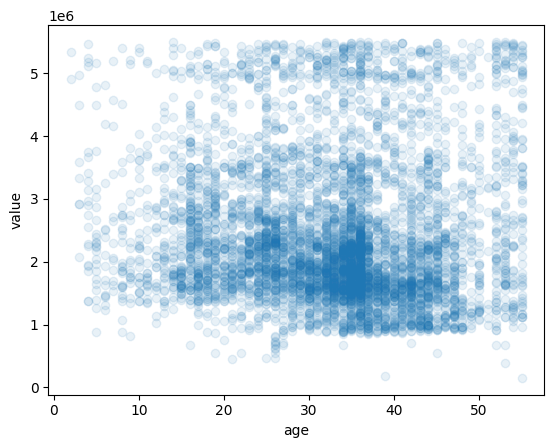

In [34]:
plt.scatter(houses_df["age"], houses_df["value"], alpha=.1)
plt.xlabel("age")
plt.ylabel("value")
plt.show()

### Plot other features

Even thought there aren't many features, we should really use a loop...

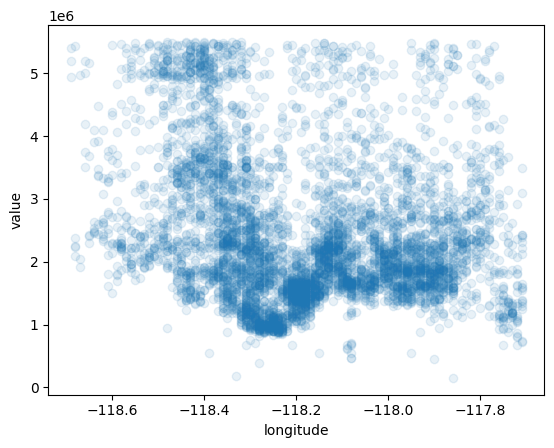

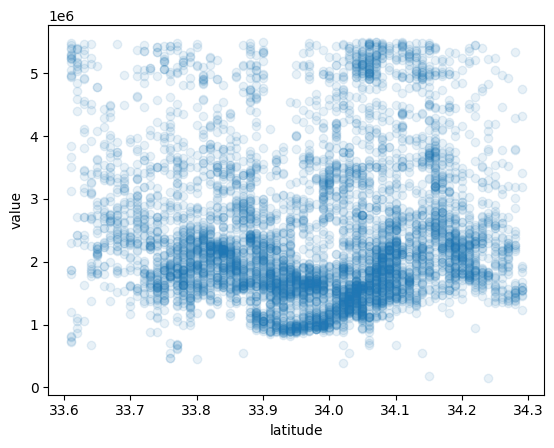

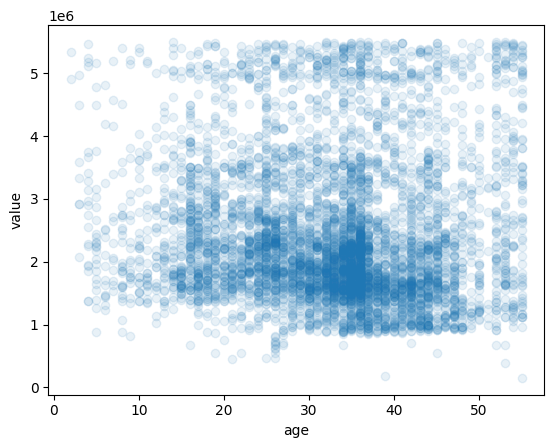

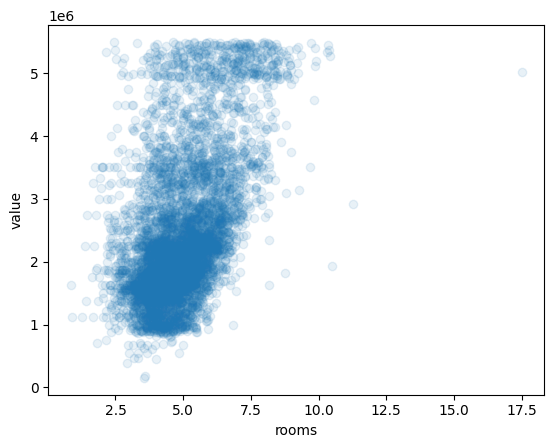

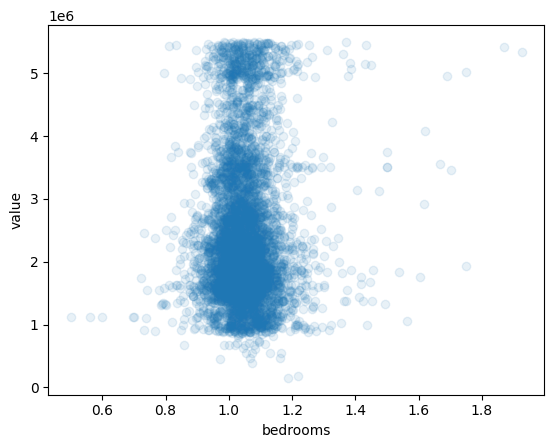

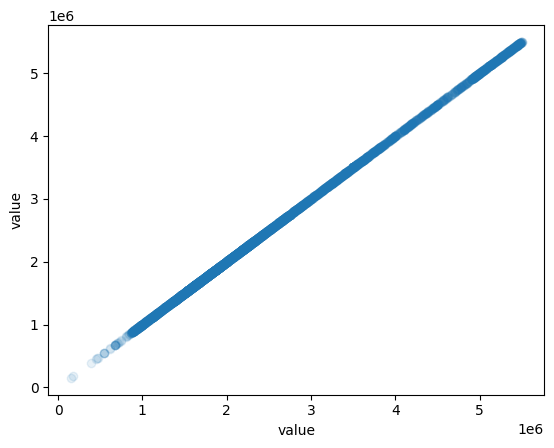

In [35]:
# TODO: use loop to plot ALL features compared to price

for f in house_features:
    plt.scatter(houses_df[f], houses_df["value"], alpha=.1)
    plt.xlabel(f)
    plt.ylabel("value")
    plt.show()

### Covariance Matrix

Instead of looking at the plots there's actually a mathematical way of calculating how much the *features* of a dataset are *related*.

It's called the [covariance](https://en.wikipedia.org/wiki/Covariance), and it measures how much $2$ *features* change together.

One way to measure the covariance is to find the average of the product of pairs of differences of measurements and their means.

# 🤔

To calculate the covariance between `age` and `price` we would have to go through all of our data, subtract `age` and `price` values for each house from the average `age` and average `price`, multiply these differences together, and then sum up all of the products and divide by the total number of houses.

$\displaystyle cov(age,\ price) = \frac{1}{n} \sum_{i}{(age_i - avg(age))\ (price_i - avg(price))}$

But, with our `DataFrame` we can just call a function that computes the covariance between any group of columns.

In [36]:
# covariance between age and price
houses_df[["age", "value"]].cov()

,age,value
age,113.474928,-4.051210e+05
value,-405121.027824,1.317590e+12


### Try it out

Computer some covariances and see if they match with the plots above

In [46]:
for f in house_features:
    print()
    print(houses_df[["age", f]].cov())


                  age  longitude
age        113.474928  -0.623192
longitude   -0.623192   0.043779

                 age  latitude
age       113.474928  0.453918
latitude    0.453918  0.024543

            age         age
age  113.474928  113.474928
age  113.474928  113.474928

              age     rooms
age    113.474928 -0.498693
rooms   -0.498693  1.626448

                 age  bedrooms
age       113.474928 -0.093484
bedrooms   -0.093484  0.006570

                 age         value
age       113.474928 -4.051210e+05
value -405121.027824  1.317590e+12


In [45]:
# TODO: display some other pairs of covariances
houses_df[["age", "bedrooms"]].cov()



,age,bedrooms
age,113.474928,-0.093484
bedrooms,-0.093484,0.006570


In [48]:
#testing
houses_df[["age", "bedrooms", "value"]].cov()


,age,bedrooms,value
age,113.474928,-0.093484,-4.051210e+05
bedrooms,-0.093484,0.006570,2.642742e+03
value,-405121.027824,2642.742490,1.317590e+12


### Displaying all of the covariances

This will display a table/matrix that shows how much each variable is related to every other variable.

In [47]:
houses_df.cov()

,longitude,latitude,age,rooms,bedrooms,value
longitude,0.043779,-0.016565,-0.623192,0.039776,-0.000965,-5.472691e+04
latitude,-0.016565,0.024543,0.453918,-0.017055,-0.000085,1.804133e+03
age,-0.623192,0.453918,113.474928,-0.498693,-0.093484,-4.051210e+05
rooms,0.039776,-0.017055,-0.498693,1.626448,0.001136,7.454463e+05
bedrooms,-0.000965,-0.000085,-0.093484,0.001136,0.006570,2.642742e+03
value,-54726.912777,1804.133416,-405121.027824,745446.273752,2642.742490,1.317590e+12


This will be useful when we start training models and want to reduce the amount of data we have to process, but for now we can just look at the covariances for the `value` *feature*:

In [49]:
houses_df.cov()["value"]

longitude   -5.472691e+04
latitude     1.804133e+03
age         -4.051210e+05
rooms        7.454463e+05
bedrooms     2.642742e+03
value        1.317590e+12
Name: value, dtype: float64

If we look at the *covariances* with the largest magnitudes, we can see that:
- `value` correlates with `rooms`: the more rooms, the higher the price of a house.
- `value` correlates inversely with `age`: the older the house, the less valuable it is.
- `value` correlates somewhat with `longitude`.

We skipped the largest magnitude of them all, because it's the correlation between `value` and itself, which should be high.

### Normalizing / Standardizing / Scaling

The above calculations give us some extra information about the data, but there are problems:

All of the *features* are in different units. The range of the `rooms` *feature* is between $1$ and $17$, while the range of `age` is $2$ to $55$, and `latitude` and `longitude` vary by at most $1$ degree.

Using different units to calculate the *covariance* can exaggerate how much certain *features* actually influence each other.

In order to calculate *covariance* correctly we have to normalize the data in all columns to be *unitless*.

One way to do this is to scale each value to be within the range $[0, 1]$ relative to the `min` and `max` values of their column.

### [MinMax Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html):

<img src="./imgs/scaling_min_max.jpg" width="700px">

The math is not very complicated, it's actually exactly like the `map()` function from `p5.js`, but we're going to use a library that will do this for us because it can do on multiple columns at the same time and it will keep track of the changes we make to our original `DataFrame`.

In [50]:
# Scale all the values to be between 0, 1

# This creates a scaler object we can use
min_max_scaler = MinMaxScaler()

# This is how we use the object on our data
houses_min_max_df = min_max_scaler.fit_transform(houses_df)

# Scaled version of DataFrame
houses_min_max_df.head()

,longitude,latitude,age,rooms,bedrooms,value
0,1.0,0.794118,0.283019,0.409277,0.368242,0.624778
1,1.0,0.750000,0.339623,0.312570,0.363476,0.419823
2,1.0,0.720588,0.943396,0.219400,0.495362,0.369332
3,1.0,0.720588,0.735849,0.220132,0.390561,0.205705
4,1.0,0.705882,0.641509,0.277022,0.340486,0.268725


In [52]:
# Now we can finally correctly calculate the covariances
houses_min_max_df.cov()["value"]

longitude   -0.010443
latitude     0.000496
age         -0.001429
rooms        0.008370
bedrooms     0.000347
value        0.046076
Name: value, dtype: float64

After we scale our features according to the `min` and `max` value of each column, `longitude` is the top feature that correlates with `value`, followed by `rooms` and then `age`.

### [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

This is another type of *normalization* that uses the `mean` and `standard deviation` for each column to center their values at $0$ and have a range of about $[-3, 3]$.

<img src="./imgs/scaling_std.jpg" width="700px">

The math is very similar to `MinMax` scaling.

One of the differences between `MinMax` and `Standard` scaling is that the range for `MinMax` is closed once we scale our data. If later, while collecting some new data, we see some value that is larger than the previously largest number, (or smallest than the smallest number), it will get scaled to something greater than $1$ (or less than $0$), and mess up our scaling.

`Standard` scaling is a bit more resilient to this scenario because our range of $[-3, 3]$ is open. We can always get values larger than $3$, or smaller than $-3$, but they're unlikely. And, unless we collect a lot of new data with wildly different ranges, our `mean` and `std dev` will remain similar and our scaling will still work.

`Standard` scaling is also available from the [Scikit-Learn](https://scikit-learn.org) library, so we can use it just like we used the `MinMax`:

In [53]:
# Scale all the values to be centered at 0 and (mostly) within [-3, 3]

# This creates a scaler object we can use
std_scaler = StandardScaler()

# This is how we use the object on our data
houses_std_df = std_scaler.fit_transform(houses_df)

# Scaled version of DataFrame
houses_std_df.head()

,longitude,latitude,age,rooms,bedrooms,value
0,2.237109,1.120307,-1.461061,2.147998,-0.279743,0.920311
1,2.237109,0.928795,-1.179412,0.885026,-0.363608,-0.034589
2,2.237109,0.801120,1.824849,-0.331744,1.956755,-0.269829
3,2.237109,0.801120,0.792134,-0.322181,0.112916,-1.032181
4,2.237109,0.737283,0.322718,0.420779,-0.768089,-0.738567


In [54]:
# Now we can finally correctly calculate the covariances
houses_std_df.cov()["value"]

longitude   -0.227905
latitude     0.010034
age         -0.033138
rooms        0.509309
bedrooms     0.028409
value        1.000173
Name: value, dtype: float64

We can see that if we scale our features according to the `mean` and `std dev` of each column, `longitude` is the top feature that correlates with `value`, followed by `rooms` and then `age`.

In this case `MinMax` and `Standard` *scaling* are in agreement, but it's not always the case.

Either way, *Normalizing* (or, *Standardizing*, or, *Scaling*) is an important step when working with data.

This is not only true for calculating *covariances* and learning something about our datasets, but is even more important when training models with multiple *features*.

## One more dataset

Let's load...

In [55]:
# Define the location of the json file here
DIAMONDS_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/diamonds.json"

# Read into Python object
diamonds_data = object_from_json_url(DIAMONDS_FILE)

# Create DataFrame
diamonds_df = pd.DataFrame.from_records(diamonds_data)

# Look at first few entries
diamonds_df.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.51,61.4,59.0,5.10,5.16,3.15,Very Good,E,VVS2,2211
1,0.31,58.9,61.0,4.46,4.43,2.62,Premium,H,VS2,586
2,0.31,62.2,55.0,4.35,4.40,2.72,Ideal,G,IF,891
3,0.78,60.0,56.0,6.00,6.03,3.61,Very Good,E,VS1,3601
4,0.40,62.2,56.0,4.75,4.70,2.94,Ideal,H,VVS2,1125


### Calculate some statistics for the features of this dataset

Use a for loop to get `min()`, `max()`, `mean()` and `std()` for all features.

In [61]:
# TODO: get min, max, mean, std for all features

for f in diamonds_df:
    if f != "cut" or "color" or "clarity":
        print(f)
        print(diamonds_df[f].min())
        print(diamonds_df[f].max())
        print(diamonds_df[f].mean())
        print(diamonds_df[f].std())
        print()


carat
0.2
2.19
0.7464884868421054
0.39936680316428236

depth
43.0
71.6
61.751870888157896
1.340634807718821

table
49.0
73.0
57.38616365131578
2.1621880082809737

x
3.74
8.35
5.636121847587719
1.021099119941105

y
3.71
8.3
5.639258497807018
1.014822157070998

z
1.41
6.0
3.481415158991228
0.6316824936107895

cut
Fair
Very Good


TypeError: Could not convert string 'Very GoodPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumIdealGoodVery GoodGoodVery GoodVery GoodIdealVery GoodVery GoodPremiumIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodPremiumFairVery GoodIdealPremiumVery GoodIdealGoodIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumIdealIdealFairPremiumIdealPremiumGoodIdealIdealGoodIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealPremiumGoodVery GoodGoodVery GoodFairVery GoodPremiumGoodIdealVery GoodIdealIdealIdealGoodVery GoodIdealPremiumVery GoodVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealGoodIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealGoodVery GoodIdealGoodVery GoodIdealGoodIdealVery GoodPremiumPremiumIdealIdealGoodPremiumPremiumIdealGoodIdealVery GoodVery GoodGoodPremiumGoodPremiumPremiumIdealPremiumIdealGoodIdealVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealGoodVery GoodPremiumIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodIdealPremiumGoodIdealPremiumPremiumIdealPremiumIdealPremiumIdealGoodGoodIdealIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealFairVery GoodIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumIdealIdealFairPremiumIdealVery GoodVery GoodVery GoodIdealGoodVery GoodPremiumVery GoodIdealVery GoodGoodIdealGoodIdealPremiumIdealVery GoodPremiumFairIdealVery GoodIdealPremiumIdealPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodIdealGoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumPremiumPremiumVery GoodIdealGoodVery GoodIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealPremiumGoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealVery GoodGoodPremiumGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodGoodGoodIdealIdealIdealIdealVery GoodGoodIdealIdealIdealFairIdealIdealIdealGoodPremiumIdealGoodIdealGoodPremiumIdealIdealVery GoodVery GoodPremiumIdealFairIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumGoodIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealVery GoodGoodPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodIdealPremiumIdealIdealGoodPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealVery GoodIdealFairVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealGoodVery GoodIdealFairGoodPremiumGoodVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumGoodVery GoodVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealGoodPremiumVery GoodIdealIdealVery GoodGoodIdealVery GoodGoodVery GoodIdealIdealGoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealGoodGoodPremiumFairVery GoodPremiumIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealGoodIdealGoodVery GoodIdealIdealGoodIdealPremiumIdealVery GoodIdealIdealIdealFairIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodGoodGoodIdealVery GoodPremiumVery GoodGoodIdealPremiumVery GoodVery GoodPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealVery GoodVery GoodGoodPremiumPremiumIdealIdealIdealVery GoodPremiumGoodVery GoodIdealVery GoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumGoodIdealPremiumIdealGoodIdealVery GoodFairIdealVery GoodPremiumIdealGoodIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumGoodIdealIdealPremiumVery GoodVery GoodFairPremiumPremiumIdealIdealPremiumPremiumIdealGoodVery GoodIdealIdealPremiumPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealGoodIdealIdealGoodVery GoodPremiumFairPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumGoodIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodGoodIdealIdealVery GoodIdealIdealVery GoodPremiumVery GoodPremiumVery GoodFairGoodIdealPremiumVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealGoodPremiumPremiumIdealPremiumVery GoodIdealIdealGoodIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodFairPremiumIdealVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealGoodIdealGoodIdealIdealVery GoodIdealIdealVery GoodGoodVery GoodIdealGoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodGoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealFairIdealIdealVery GoodIdealIdealGoodPremiumPremiumPremiumVery GoodIdealVery GoodPremiumFairIdealPremiumPremiumIdealFairPremiumIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealVery GoodVery GoodGoodIdealIdealPremiumGoodVery GoodPremiumPremiumGoodGoodVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealGoodIdealIdealPremiumIdealFairPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodFairIdealIdealIdealGoodFairPremiumVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealVery GoodGoodPremiumIdealPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealVery GoodPremiumGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodGoodIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumGoodPremiumVery GoodPremiumIdealVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodGoodIdealIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealFairIdealIdealIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealPremiumPremiumVery GoodIdealPremiumFairIdealIdealVery GoodPremiumIdealVery GoodVery GoodPremiumIdealPremiumIdealIdealFairPremiumPremiumGoodVery GoodVery GoodIdealPremiumIdealVery GoodGoodIdealIdealIdealFairVery GoodIdealVery GoodFairGoodPremiumGoodPremiumGoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealIdealIdealPremiumVery GoodIdealPremiumGoodIdealIdealIdealVery GoodVery GoodPremiumGoodIdealVery GoodPremiumVery GoodIdealVery GoodGoodIdealIdealPremiumIdealPremiumIdealIdealVery GoodPremiumPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodPremiumGoodIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodGoodIdealPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumFairGoodPremiumIdealVery GoodIdealGoodPremiumIdealPremiumPremiumGoodIdealIdealVery GoodIdealPremiumPremiumVery GoodPremiumIdealGoodIdealVery GoodVery GoodVery GoodGoodPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodPremiumGoodVery GoodVery GoodIdealVery GoodGoodIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumGoodVery GoodVery GoodPremiumPremiumIdealGoodIdealVery GoodVery GoodVery GoodGoodPremiumIdealVery GoodVery GoodIdealGoodPremiumIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealGoodGoodPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodGoodPremiumPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumVery GoodIdealIdealFairIdealPremiumPremiumIdealIdealPremiumVery GoodGoodVery GoodPremiumIdealFairPremiumVery GoodPremiumIdealGoodVery GoodIdealIdealGoodPremiumIdealIdealVery GoodFairPremiumVery GoodIdealVery GoodIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodGoodIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodIdealFairVery GoodIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodGoodPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodGoodPremiumIdealPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodFairVery GoodIdealVery GoodIdealIdealFairIdealVery GoodIdealPremiumIdealGoodIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealFairIdealIdealVery GoodVery GoodPremiumGoodPremiumVery GoodIdealVery GoodGoodVery GoodGoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealFairVery GoodGoodPremiumVery GoodIdealVery GoodIdealGoodIdealGoodIdealIdealIdealIdealPremiumIdealGoodIdealVery GoodVery GoodIdealPremiumIdealIdealGoodIdealIdealIdealPremiumFairVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumGoodIdealPremiumIdealIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealGoodPremiumIdealPremiumIdealGoodIdealIdealVery GoodFairIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealVery GoodGoodIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodGoodPremiumPremiumPremiumIdealGoodIdealIdealVery GoodVery GoodPremiumFairPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumVery GoodGoodVery GoodIdealGoodVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumIdealGoodPremiumGoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealPremiumGoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealGoodIdealIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodGoodIdealVery GoodPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealGoodPremiumIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealGoodVery GoodIdealGoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodIdealIdealGoodVery GoodPremiumVery GoodIdealPremiumPremiumPremiumVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodGoodVery GoodGoodIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealFairPremiumIdealPremiumIdealVery GoodPremiumIdealIdealIdealGoodGoodIdealIdealVery GoodPremiumVery GoodIdealIdealGoodGoodGoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodGoodIdealIdealIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodGoodIdealPremiumIdealGoodVery GoodVery GoodGoodVery GoodVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealPremiumGoodPremiumGoodVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealPremiumFairIdealIdealFairFairIdealGoodIdealPremiumIdealPremiumGoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodPremiumGoodVery GoodVery GoodFairPremiumVery GoodIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealFairPremiumPremiumGoodGoodIdealPremiumIdealGoodIdealVery GoodIdealPremiumVery GoodIdealIdealGoodPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealGoodPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumGoodIdealIdealGoodVery GoodGoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumPremiumIdealIdealGoodVery GoodVery GoodVery GoodPremiumGoodVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodGoodIdealVery GoodVery GoodVery GoodIdealPremiumGoodPremiumPremiumPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealFairIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumFairGoodIdealIdealVery GoodPremiumIdealPremiumGoodGoodVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumVery GoodPremiumPremiumGoodGoodIdealIdealPremiumPremiumGoodGoodIdealIdealIdealGoodIdealPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumIdealGoodIdealGoodVery GoodIdealGoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodPremiumIdealGoodIdealVery GoodGoodPremiumIdealPremiumGoodIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodGoodPremiumIdealPremiumIdealIdealIdealIdealPremiumGoodPremiumGoodIdealPremiumIdealPremiumIdealIdealVery GoodPremiumIdealGoodPremiumGoodVery GoodIdealIdealPremiumIdealVery GoodIdealGoodIdealGoodIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodGoodPremiumGoodIdealIdealFairIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodGoodVery GoodPremiumVery GoodVery GoodPremiumGoodIdealIdealIdealVery GoodIdealFairGoodPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodPremiumIdealVery GoodGoodIdealVery GoodVery GoodGoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodGoodVery GoodPremiumVery GoodIdealIdealIdealFairIdealVery GoodIdealIdealVery GoodVery GoodIdealVery GoodIdealGoodGoodVery GoodPremiumIdealPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumGoodVery GoodIdealIdealPremiumPremiumGoodVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealGoodVery GoodGoodIdealPremiumVery GoodIdealVery GoodGoodIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealGoodPremiumIdealPremiumVery GoodPremiumVery GoodIdealGoodIdealPremiumIdealGoodIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodIdealPremiumFairGoodPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumIdealVery GoodFairVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodPremiumGoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumVery GoodPremiumPremiumVery GoodGoodPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumFairVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealGoodVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodGoodIdealGoodIdealPremiumGoodIdealIdealVery GoodPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumIdealGoodIdealPremiumIdealIdealPremiumGoodVery GoodVery GoodGoodVery GoodPremiumVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodGoodGoodPremiumVery GoodPremiumVery GoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealGoodPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumVery GoodPremiumFairIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodPremiumGoodIdealIdealIdealFairIdealVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumGoodIdealPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodIdealFairPremiumPremiumIdealIdealIdealIdealIdealIdealFairVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealVery GoodGoodVery GoodGoodGoodVery GoodIdealGoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumPremiumVery GoodFairPremiumGoodPremiumIdealIdealGoodIdealPremiumVery GoodIdealIdealPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodPremiumPremiumFairIdealGoodPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumPremiumGoodIdealVery GoodPremiumPremiumVery GoodIdealPremiumGoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealGoodIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealGoodGoodGoodIdealPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodIdealGoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealGoodPremiumPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodIdealIdealVery GoodFairVery GoodPremiumFairIdealGoodPremiumIdealIdealIdealPremiumVery GoodPremiumIdealPremiumFairPremiumIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumVery GoodGoodIdealIdealIdealGoodVery GoodIdealPremiumPremiumIdealVery GoodPremiumPremiumGoodPremiumIdealIdealIdealIdealIdealVery GoodGoodPremiumIdealIdealIdealFairPremiumVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumGoodIdealPremiumVery GoodIdealGoodIdealPremiumVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodGoodFairGoodVery GoodIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumGoodGoodIdealIdealVery GoodIdealPremiumIdealPremiumPremiumIdealVery GoodVery GoodPremiumGoodFairIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealFairIdealPremiumVery GoodPremiumVery GoodIdealGoodVery GoodVery GoodGoodGoodGoodPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodFairFairPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumGoodVery GoodIdealPremiumVery GoodIdealIdealGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealIdealPremiumIdealGoodPremiumIdealPremiumGoodFairGoodIdealPremiumPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealPremiumGoodPremiumIdealIdealIdealVery GoodIdealIdealVery GoodGoodIdealPremiumIdealGoodPremiumIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodPremiumIdealVery GoodIdealIdealGoodPremiumIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodGoodPremiumPremiumIdealIdealVery GoodGoodGoodIdealGoodIdealPremiumGoodIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealGoodVery GoodPremiumVery GoodIdealPremiumIdealGoodVery GoodIdealGoodIdealIdealPremiumPremiumIdealGoodVery GoodIdealGoodIdealFairIdealIdealPremiumIdealIdealGoodPremiumIdealVery GoodIdealGoodPremiumIdealPremiumVery GoodGoodPremiumIdealPremiumGoodPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealGoodVery GoodIdealPremiumIdealPremiumIdealPremiumIdealIdealPremiumVery GoodGoodIdealPremiumGoodIdealIdealGoodPremiumGoodPremiumPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumPremiumGoodPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodGoodVery GoodPremiumVery GoodFairIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodGoodVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealGoodIdealIdealVery GoodIdealPremiumIdealGoodPremiumVery GoodGoodIdealVery GoodIdealVery GoodFairIdealPremiumIdealFairIdealVery GoodFairVery GoodVery GoodIdealPremiumGoodVery GoodVery GoodGoodGoodGoodVery GoodPremiumIdealIdealVery GoodPremiumGoodPremiumGoodFairIdealIdealGoodGoodVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealIdealIdealGoodVery GoodVery GoodPremiumPremiumPremiumIdealPremiumGoodGoodPremiumVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumIdealIdealGoodVery GoodGoodPremiumIdealVery GoodFairPremiumPremiumGoodPremiumIdealVery GoodIdealIdealIdealGoodGoodIdealPremiumPremiumIdealGoodVery GoodGoodIdealIdealIdealIdealPremiumIdealGoodIdealVery GoodPremiumGoodIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodIdealGoodPremiumIdealGoodPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealVery GoodGoodPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealPremiumGoodIdealIdealIdealIdealPremiumGoodIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealGoodVery GoodIdealFairIdealIdealGoodIdealPremiumGoodPremiumIdealIdealPremiumPremiumGoodIdealVery GoodIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumGoodGoodGoodVery GoodIdealPremiumPremiumVery GoodIdealGoodGoodIdealIdealIdealPremiumVery GoodVery GoodPremiumVery GoodGoodVery GoodPremiumVery GoodIdealPremiumVery GoodVery GoodGoodPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodGoodPremiumPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealVery GoodIdealIdealVery GoodGoodFairIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumVery GoodGoodVery GoodVery GoodVery GoodVery GoodGoodGoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodGoodPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealGoodVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealIdealGoodVery GoodVery GoodPremiumIdealPremiumIdealVery GoodGoodIdealPremiumPremiumIdealVery GoodIdealPremiumIdealGoodIdealVery GoodGoodIdealVery GoodIdealIdealVery GoodGoodVery GoodPremiumFairIdealGoodIdealIdealIdealIdealVery GoodGoodIdealIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealVery GoodPremiumGoodGoodIdealVery GoodIdealIdealVery GoodIdealIdealIdealPremiumGoodVery GoodIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodGoodIdealVery GoodVery GoodPremiumGoodVery GoodIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealGoodPremiumVery GoodVery GoodPremiumGoodVery GoodGoodVery GoodGoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodPremiumVery GoodGoodVery GoodPremiumIdealGoodIdealIdealGoodPremiumGoodPremiumIdealPremiumIdealVery GoodGoodIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumIdealGoodPremiumPremiumGoodPremiumVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodGoodFairIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodGoodIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumFairGoodGoodIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumGoodIdealVery GoodGoodIdealIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodFairIdealIdealVery GoodPremiumGoodVery GoodIdealVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealIdealFairVery GoodVery GoodFairIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodVery GoodPremiumIdealVery GoodGoodPremiumIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodPremiumPremiumVery GoodGoodIdealIdealPremiumIdealIdealIdealIdealFairPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodFairVery GoodPremiumIdealVery GoodIdealIdealPremiumGoodGoodFairIdealVery GoodIdealGoodIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodIdealIdealVery GoodGoodIdealPremiumPremiumGoodIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumGoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumGoodIdealIdealIdealGoodVery GoodGoodVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumFairVery GoodGoodPremiumIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodFairGoodIdealPremiumIdealFairGoodPremiumIdealPremiumGoodIdealIdealPremiumPremiumGoodGoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumIdealPremiumGoodVery GoodIdealVery GoodVery GoodGoodIdealIdealPremiumIdealGoodIdealPremiumVery GoodIdealVery GoodGoodPremiumIdealVery GoodPremiumIdealIdealGoodPremiumPremiumPremiumPremiumPremiumIdealIdealGoodVery GoodGoodIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumVery GoodIdealGoodVery GoodIdealGoodVery GoodVery GoodIdealFairPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodIdealIdealGoodIdealIdealPremiumIdealPremiumFairVery GoodPremiumPremiumGoodVery GoodFairPremiumIdealVery GoodIdealIdealPremiumGoodVery GoodPremiumPremiumPremiumIdealFairIdealVery GoodIdealIdealPremiumGoodPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumGoodPremiumVery GoodIdealIdealVery GoodGoodVery GoodGoodVery GoodIdealGoodVery GoodPremiumPremiumIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealGoodIdealPremiumVery GoodGoodVery GoodIdealIdealIdealGoodPremiumPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumGoodVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodPremiumPremiumPremiumIdealVery GoodGoodIdealGoodVery GoodIdealPremiumGoodGoodPremiumGoodPremiumGoodIdealVery GoodIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumVery GoodPremiumPremiumGoodGoodVery GoodPremiumIdealIdealGoodPremiumPremiumIdealFairIdealPremiumIdealPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumGoodIdealVery GoodPremiumPremiumIdealGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealFairVery GoodPremiumIdealGoodGoodIdealVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumVery GoodVery GoodPremiumFairGoodIdealVery GoodIdealIdealIdealGoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumIdealGoodIdealGoodIdealIdealGoodFairIdealVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumGoodIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumPremiumGoodIdealVery GoodIdealGoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumGoodIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealGoodIdealPremiumPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealGoodVery GoodVery GoodGoodPremiumVery GoodIdealPremiumIdealIdealIdealPremiumGoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealVery GoodGoodVery GoodIdealPremiumGoodIdealIdealVery GoodVery GoodGoodIdealFairIdealPremiumPremiumGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumFairVery GoodPremiumPremiumPremiumGoodVery GoodIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealGoodPremiumVery GoodPremiumPremiumGoodPremiumIdealGoodIdealIdealIdealVery GoodGoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumPremiumIdealGoodGoodIdealIdealGoodIdealVery GoodGoodIdealIdealPremiumIdealPremiumIdealVery GoodPremiumVery GoodGoodIdealFairVery GoodVery GoodIdealPremiumPremiumPremiumGoodGoodIdealIdealIdealIdealIdealPremiumGoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodIdealPremiumIdealGoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealIdealIdealGoodPremiumIdealIdealIdealIdealPremiumGoodPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumGoodGoodVery GoodIdealPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealVery GoodGoodIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealPremiumIdealPremiumVery GoodPremiumFairVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumPremiumGoodPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodIdealGoodIdealGoodVery GoodGoodVery GoodPremiumVery GoodVery GoodIdealVery GoodGoodIdealIdealPremiumIdealGoodVery GoodIdealVery GoodGoodPremiumIdealPremiumPremiumVery GoodIdealVery GoodFairGoodVery GoodVery GoodIdealPremiumIdealFairVery GoodVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealGoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodIdealGoodPremiumIdealVery GoodGoodGoodPremiumIdealIdealGoodIdealIdealIdealIdealVery GoodFairPremiumIdealIdealPremiumGoodIdealIdealIdealVery GoodGoodIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealGoodPremiumIdealVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodGoodPremiumGoodPremiumIdealPremiumPremiumIdealIdealVery GoodIdealIdealPremiumVery GoodIdealGoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumPremiumFairIdealGoodVery GoodIdealFairGoodIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumIdealIdealGoodIdealIdealPremiumGoodPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealPremiumGoodPremiumIdealIdealGoodPremiumPremiumIdealIdealIdealIdealIdealVery GoodVery GoodGoodVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealPremiumIdealGoodIdealPremiumIdealIdealIdealGoodPremiumVery GoodIdealVery GoodGoodFairPremiumIdealIdealPremiumGoodIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodIdealGoodIdealIdealIdealGoodIdealVery GoodGoodVery GoodVery GoodGoodGoodVery GoodIdealVery GoodIdealPremiumGoodIdealVery GoodIdealVery GoodGoodVery GoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumGoodPremiumVery GoodIdealPremiumIdealFairPremiumPremiumPremiumIdealIdealIdealVery GoodIdealPremiumGoodPremiumIdealVery GoodPremiumVery GoodIdealPremiumPremiumFairVery GoodIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealGoodIdealIdealGoodPremiumPremiumIdealIdealGoodPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumFairIdealPremiumVery GoodGoodVery GoodVery GoodIdealPremiumPremiumGoodGoodGoodIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealVery GoodGoodIdealPremiumPremiumIdealIdealIdealGoodIdealVery GoodPremiumIdealIdealGoodIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumGoodPremiumPremiumIdealVery GoodIdealVery GoodGoodVery GoodFairVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumGoodGoodGoodIdealIdealIdealIdealGoodFairGoodPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealGoodVery GoodIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealVery GoodPremiumIdealVery GoodGoodPremiumIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumGoodIdealIdealIdealGoodVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealFairPremiumGoodIdealIdealPremiumIdealIdealPremiumIdealVery GoodPremiumGoodIdealGoodPremiumPremiumIdealGoodIdealGoodPremiumPremiumPremiumVery GoodIdealIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumIdealGoodIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumGoodIdealGoodIdealIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodIdealPremiumIdealGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealPremiumPremiumIdealGoodIdealIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodIdealGoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodIdealIdealVery GoodIdealIdealPremiumVery GoodGoodIdealIdealPremiumIdealIdealGoodIdealPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodGoodIdealGoodIdealVery GoodIdealGoodPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumIdealIdealFairIdealPremiumIdealVery GoodIdealGoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodIdealFairVery GoodVery GoodIdealIdealPremiumIdealVery GoodGoodIdealGoodIdealVery GoodGoodVery GoodIdealVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodGoodIdealIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealVery GoodIdealIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealGoodVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealGoodIdealVery GoodIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodGoodIdealVery GoodPremiumVery GoodIdealGoodVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealGoodGoodGoodPremiumIdealIdealVery GoodPremiumIdealVery GoodGoodIdealPremiumPremiumIdealIdealIdealGoodIdealPremiumIdealVery GoodPremiumGoodPremiumIdealIdealIdealIdealVery GoodGoodIdealGoodIdealVery GoodIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealGoodVery GoodIdealIdealPremiumGoodPremiumPremiumIdealIdealPremiumGoodVery GoodIdealGoodIdealIdealPremiumVery GoodPremiumFairPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealPremiumPremiumIdealVery GoodIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealGoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodIdealVery GoodGoodIdealPremiumGoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodFairIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodGoodIdealVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealIdealPremiumGoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealIdealPremiumVery GoodGoodFairIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealGoodIdealPremiumVery GoodIdealIdealFairGoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodGoodVery GoodGoodPremiumPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodPremiumVery GoodPremiumIdealVery GoodGoodGoodIdealIdealIdealPremiumIdealFairIdealPremiumPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumGoodIdealIdealPremiumPremiumIdealFairPremiumPremiumVery GoodIdealVery GoodPremiumGoodGoodIdealGoodVery GoodFairPremiumPremiumGoodPremiumIdealIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodGoodPremiumPremiumIdealIdealIdealPremiumPremiumPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodGoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealGoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealPremiumGoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodFairIdealPremiumVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealVery GoodFairIdealIdealPremiumPremiumIdealPremiumVery GoodIdealGoodVery GoodIdealIdealPremiumPremiumVery GoodPremiumVery GoodPremiumGoodIdealIdealGoodVery GoodFairVery GoodFairIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumGoodVery GoodVery GoodPremiumIdealGoodPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumFairIdealPremiumGoodIdealPremiumIdealIdealIdealVery GoodPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumFairIdealVery GoodVery GoodPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodFairPremiumVery GoodIdealIdealIdealGoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumGoodGoodVery GoodPremiumPremiumFairIdealIdealIdealIdealVery GoodGoodIdealPremiumIdealPremiumPremiumVery GoodFairPremiumPremiumIdealIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumVery GoodIdealFairPremiumPremiumVery GoodIdealIdealIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumGoodIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodGoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealIdealPremiumGoodIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealFairVery GoodPremiumIdealPremiumVery GoodGoodIdealPremiumIdealPremiumPremiumIdealFairIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumGoodIdealVery GoodIdealIdealIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealVery GoodPremiumIdealGoodPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumGoodVery GoodPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodGoodIdealVery GoodVery GoodPremiumIdealIdealVery GoodPremiumVery GoodPremiumIdealFairIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealGoodPremiumVery GoodIdealPremiumIdealGoodGoodVery GoodIdealPremiumGoodIdealIdealIdealIdealVery GoodIdealVery GoodIdealGoodPremiumPremiumIdealGoodVery GoodIdealIdealGoodVery GoodPremiumIdealIdealPremiumIdealVery GoodPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumGoodVery GoodIdealPremiumIdealVery GoodGoodIdealPremiumPremiumPremiumGoodVery GoodIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealFairPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumFairPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumGoodVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealGoodPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumFairIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealGoodVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealFairIdealPremiumVery GoodIdealVery GoodIdealPremiumPremiumVery GoodIdealPremiumFairVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodGoodIdealIdealGoodIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealPremiumVery GoodPremiumFairFairPremiumIdealIdealVery GoodVery GoodGoodIdealIdealVery GoodGoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumGoodPremiumPremiumVery GoodVery GoodGoodIdealPremiumVery GoodPremiumPremiumPremiumIdealVery GoodIdealGoodIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodGoodVery GoodIdealPremiumIdealGoodIdealIdealVery GoodGoodIdealIdealVery GoodGoodIdealPremiumPremiumPremiumIdealIdealGoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumVery GoodIdealFairVery GoodPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealVery GoodGoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumGoodGoodIdealPremiumIdealIdealIdealIdealVery GoodIdealVery GoodPremiumPremiumVery GoodIdealGoodPremiumFairIdealVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealGoodVery GoodIdealIdealIdealIdealGoodPremiumPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodGoodIdealVery GoodVery GoodGoodFairPremiumIdealPremiumVery GoodGoodPremiumVery GoodGoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumGoodIdealVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealGoodVery GoodVery GoodIdealVery GoodVery GoodGoodIdealIdealIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodIdealFairIdealIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumIdealIdealPremiumPremiumVery GoodVery GoodPremiumFairVery GoodIdealIdealIdealPremiumFairIdealIdealIdealVery GoodVery GoodGoodVery GoodVery GoodGoodIdealGoodIdealIdealFairIdealFairIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealFairGoodIdealFairPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealGoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumGoodIdealVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealGoodPremiumGoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodVery GoodIdealVery GoodGoodPremiumGoodVery GoodGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodFairIdealPremiumPremiumPremiumIdealPremiumVery GoodPremiumIdealIdealGoodVery GoodGoodIdealVery GoodVery GoodPremiumVery GoodIdealIdealGoodVery GoodPremiumFairIdealIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumGoodIdealVery GoodPremiumGoodIdealVery GoodIdealVery GoodPremiumFairIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodGoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealFairIdealGoodIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealFairIdealVery GoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodGoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumGoodPremiumIdealVery GoodPremiumPremiumVery GoodPremiumGoodPremiumPremiumPremiumVery GoodGoodPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealGoodVery GoodPremiumFairIdealGoodVery GoodPremiumPremiumFairVery GoodGoodPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumVery GoodFairIdealIdealIdealIdealVery GoodGoodFairIdealVery GoodPremiumGoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealGoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumGoodPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealGoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealFairIdealPremiumFairPremiumIdealPremiumPremiumIdealPremiumPremiumGoodIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumIdealGoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumFairIdealPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealPremiumVery GoodIdealVery GoodVery GoodPremiumGoodPremiumVery GoodVery GoodIdealIdealPremiumPremiumVery GoodIdealGoodPremiumIdealIdealIdealIdealIdealGoodIdealPremiumIdealVery GoodFairIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodIdealGoodPremiumIdealGoodPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealVery GoodGoodIdealIdealVery GoodVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealGoodPremiumPremiumIdealPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealGoodIdealPremiumVery GoodGoodIdealIdealPremiumPremiumGoodGoodIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodGoodIdealGoodGoodVery GoodGoodIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumVery GoodVery GoodFairIdealIdealPremiumPremiumIdealIdealPremiumGoodIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumGoodIdealPremiumPremiumVery GoodIdealGoodGoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealGoodPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodIdealPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealGoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealGoodIdealIdealGoodGoodIdealVery GoodIdealIdealGoodIdealPremiumPremiumIdealVery GoodGoodPremiumGoodIdealIdealPremiumIdealVery GoodGoodGoodVery GoodVery GoodPremiumVery GoodFairIdealIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumIdealIdealGoodIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodGoodGoodGoodIdealIdealGoodIdealVery GoodGoodGoodIdealIdealVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumIdealGoodIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumVery GoodIdealGoodFairVery GoodIdealVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumVery GoodIdealIdealFairIdealIdealIdealVery GoodPremiumPremiumIdealFairPremiumVery GoodVery GoodPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumPremiumIdealVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealGoodIdealIdealIdealPremiumPremiumIdealPremiumVery GoodIdealVery GoodGoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodFairIdealVery GoodVery GoodGoodVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealGoodPremiumIdealGoodIdealPremiumPremiumGoodIdealGoodIdealIdealIdealGoodPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumGoodGoodVery GoodGoodIdealIdealGoodIdealVery GoodPremiumGoodIdealFairIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealGoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumGoodGoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumPremiumFairIdealVery GoodGoodVery GoodFairIdealVery GoodPremiumPremiumFairPremiumVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealIdealVery GoodIdealPremiumPremiumIdealGoodIdealPremiumIdealVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodGoodIdealPremiumVery GoodIdealVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodIdealPremiumGoodPremiumIdealIdealIdealIdealVery GoodIdealPremiumPremiumPremiumVery GoodPremiumVery GoodIdealVery GoodGoodGoodPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealPremiumGoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealPremiumIdealPremiumPremiumGoodIdealPremiumPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodIdealPremiumGoodGoodPremiumIdealVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumVery GoodGoodIdealIdealVery GoodIdealGoodIdealFairVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodGoodIdealPremiumIdealIdealIdealPremiumVery GoodFairVery GoodPremiumIdealPremiumIdealIdealIdealIdealVery GoodPremiumGoodIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealIdealIdealFairIdealGoodPremiumVery GoodVery GoodVery GoodIdealVery GoodVery GoodGoodPremiumVery GoodIdealIdealPremiumIdealIdealGoodVery GoodPremiumVery GoodGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumFairPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealIdealPremiumIdealPremiumIdealPremiumGoodIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumGoodIdealGoodIdealIdealPremiumIdealVery GoodGoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodGoodPremiumPremiumIdealPremiumGoodVery GoodIdealPremiumVery GoodGoodIdealGoodPremiumIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodFairPremiumPremiumVery GoodIdealIdealGoodIdealPremiumIdealPremiumIdealVery GoodIdealIdealGoodPremiumIdealIdealPremiumGoodGoodVery GoodVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodGoodPremiumIdealIdealPremiumVery GoodPremiumIdealVery GoodGoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodIdealIdealFairIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealVery GoodIdealGoodGoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodIdealGoodVery GoodGoodGoodPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealGoodVery GoodIdealVery GoodGoodGoodPremiumIdealIdealGoodPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodFairIdealFairFairIdealGoodIdealGoodVery GoodPremiumPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealIdealIdealGoodFairGoodPremiumGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodFairVery GoodIdealFairGoodPremiumFairVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumGoodGoodPremiumIdealIdealPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodGoodIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealPremiumIdealIdealGoodIdealIdealIdealIdealIdealVery GoodPremiumIdealFairVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealFairIdealIdealIdealVery GoodIdealGoodIdealIdealIdealVery GoodGoodIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealPremiumIdealIdealIdealPremiumGoodFairVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealGoodIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumVery GoodGoodIdealVery GoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealPremiumIdealIdealVery GoodIdealGoodIdealIdealPremiumPremiumGoodVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealGoodGoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumIdealVery GoodPremiumGoodVery GoodIdealPremiumIdealGoodGoodVery GoodPremiumIdealPremiumFairIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealVery GoodIdealIdealIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodGoodPremiumVery GoodGoodVery GoodIdealIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumPremiumVery GoodGoodVery GoodVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumGoodPremiumPremiumPremiumPremiumIdealGoodVery GoodPremiumPremiumPremiumVery GoodGoodPremiumIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealVery GoodGoodVery GoodPremiumFairGoodVery GoodPremiumIdealPremiumIdealVery GoodIdealVery GoodIdealGoodIdealVery GoodIdealVery GoodVery GoodVery GoodIdealGoodIdealVery GoodVery GoodPremiumIdealIdealGoodPremiumVery GoodPremiumPremiumVery GoodVery GoodGoodIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealVery GoodGoodIdealGoodPremiumPremiumPremiumGoodVery GoodPremiumVery GoodPremiumIdealGoodPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumGoodIdealIdealPremiumGoodVery GoodIdealIdealIdealIdealGoodIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumFairIdealPremiumIdealGoodVery GoodIdealIdealIdealIdealPremiumIdealFairIdealGoodIdealPremiumPremiumIdealIdealIdealIdealFairIdealIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumGoodIdealIdealIdealVery GoodIdealFairIdealGoodPremiumPremiumPremiumIdealGoodFairVery GoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealIdealPremiumGoodVery GoodIdealPremiumPremiumVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumVery GoodGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealGoodVery GoodVery GoodIdealPremiumGoodGoodGoodPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealGoodIdealPremiumPremiumVery GoodPremiumIdealGoodIdealPremiumIdealPremiumIdealPremiumGoodPremiumGoodPremiumPremiumGoodIdealIdealPremiumGoodIdealIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealVery GoodPremiumVery GoodIdealGoodIdealIdealPremiumIdealVery GoodGoodIdealIdealIdealVery GoodGoodIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodGoodPremiumGoodIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealGoodIdealPremiumIdealPremiumFairIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodVery GoodPremiumFairIdealIdealPremiumVery GoodPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealGoodPremiumIdealVery GoodIdealGoodIdealGoodFairIdealPremiumIdealGoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealPremiumVery GoodGoodVery GoodIdealGoodVery GoodIdealPremiumPremiumIdealVery GoodPremiumPremiumGoodIdealPremiumGoodPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealPremiumIdealGoodIdealIdealPremiumIdealPremiumIdealVery GoodIdealGoodIdealPremiumPremiumIdealVery GoodGoodIdealPremiumIdealVery GoodIdealPremiumIdealFairPremiumIdealIdealPremiumVery GoodGoodPremiumIdealIdealPremiumPremiumGoodVery GoodPremiumVery GoodPremiumPremiumFairIdealIdealPremiumGoodVery GoodVery GoodPremiumIdealIdealVery GoodIdealGoodIdealIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumPremiumGoodIdealFairIdealIdealVery GoodPremiumVery GoodVery GoodIdealFairVery GoodPremiumPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumIdealFairIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealIdealGoodIdealVery GoodIdealIdealIdealPremiumFairIdealIdealVery GoodPremiumGoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodGoodVery GoodGoodPremiumVery GoodPremiumIdealGoodIdealPremiumGoodPremiumVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealVery GoodPremiumIdealPremiumPremiumGoodIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealPremiumFairVery GoodIdealVery GoodVery GoodIdealGoodVery GoodIdealIdealPremiumPremiumFairIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealGoodVery GoodIdealIdealVery GoodGoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealGoodVery GoodVery GoodPremiumVery GoodIdealIdealPremiumGoodVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodGoodIdealIdealGoodPremiumIdealPremiumIdealVery GoodIdealIdealPremiumIdealPremiumIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealPremiumIdealIdealVery GoodIdealGoodIdealVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealVery GoodGoodPremiumPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodFairIdealPremiumPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodGoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealGoodIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodIdealPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodIdealIdealVery GoodIdealVery GoodPremiumIdealGoodIdealVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealIdealPremiumGoodPremiumIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodIdealFairIdealPremiumIdealVery GoodIdealPremiumIdealIdealGoodIdealGoodIdealIdealGoodIdealPremiumIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumGoodPremiumGoodFairIdealPremiumPremiumIdealIdealPremiumVery GoodGoodIdealVery GoodPremiumGoodPremiumVery GoodFairPremiumIdealIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumPremiumIdealPremiumGoodGoodVery GoodIdealIdealPremiumFairIdealIdealPremiumIdealIdealPremiumPremiumVery GoodGoodGoodIdealFairVery GoodVery GoodGoodPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealVery GoodFairPremiumVery GoodPremiumGoodIdealVery GoodPremiumVery GoodIdealGoodIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodGoodVery GoodIdealVery GoodVery GoodPremiumIdealGoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumGoodIdealIdealIdealIdealPremiumFairGoodIdealPremiumGoodPremiumIdealIdealIdealIdealPremiumGoodVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealVery GoodFairPremiumPremiumIdealGoodIdealPremiumPremiumIdealPremiumVery GoodGoodVery GoodIdealIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodGoodPremiumPremiumVery GoodIdealVery GoodVery GoodIdealPremiumIdealVery GoodPremiumPremiumGoodPremiumIdealVery GoodPremiumPremiumIdealVery GoodFairPremiumIdealIdealVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodVery GoodVery GoodGoodGoodVery GoodIdealGoodPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealGoodIdealGoodGoodIdealVery GoodGoodVery GoodIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealPremiumIdealIdealPremiumIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealIdealGoodPremiumPremiumPremiumGoodPremiumVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealGoodVery GoodGoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumPremiumIdealIdealFairIdealVery GoodPremiumIdealIdealVery GoodIdealIdealFairIdealIdealVery GoodVery GoodPremiumPremiumFairPremiumIdealVery GoodIdealPremiumIdealVery GoodFairPremiumVery GoodIdealVery GoodIdealVery GoodIdealVery GoodIdealGoodGoodIdealPremiumPremiumPremiumPremiumPremiumPremiumGoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodGoodGoodIdealGoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealGoodIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealGoodIdealVery GoodIdealPremiumVery GoodPremiumGoodVery GoodIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodIdealIdealVery GoodGoodVery GoodPremiumFairPremiumVery GoodIdealIdealVery GoodPremiumGoodIdealVery GoodIdealPremiumVery GoodFairPremiumFairPremiumIdealPremiumIdealVery GoodGoodIdealPremiumIdealFairIdealIdealIdealVery GoodIdealGoodVery GoodPremiumIdealGoodPremiumIdealVery GoodVery GoodIdealIdealPremiumGoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealIdealPremiumPremiumFairIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealPremiumFairVery GoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumGoodPremiumPremiumPremiumIdealPremiumIdealPremiumVery GoodGoodIdealPremiumFairIdealGoodIdealIdealIdealVery GoodPremiumGoodPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealGoodIdealIdealPremiumVery GoodIdealVery GoodPremiumGoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealGoodGoodPremiumVery GoodPremiumPremiumIdealFairIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumPremiumGoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealVery GoodGoodPremiumIdealIdealPremiumGoodIdealVery GoodPremiumIdealGoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodIdealGoodVery GoodIdealIdealVery GoodGoodPremiumIdealIdealIdealIdealPremiumGoodGoodIdealPremiumIdealPremiumPremiumVery GoodIdealIdealIdealIdealGoodPremiumGoodPremiumIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodPremiumIdealGoodIdealIdealIdealIdealPremiumIdealIdealIdealPremiumGoodIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodIdealGoodPremiumIdealIdealIdealPremiumIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumFairIdealPremiumGoodIdealIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumFairGoodGoodIdealIdealIdealFairPremiumFairPremiumIdealIdealGoodIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealGoodIdealIdealGoodIdealIdealGoodVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodPremiumFairVery GoodIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealGoodPremiumIdealGoodIdealPremiumIdealIdealVery GoodIdealGoodPremiumIdealPremiumFairVery GoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodGoodIdealVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealGoodIdealPremiumIdealPremiumPremiumGoodPremiumVery GoodIdealVery GoodIdealIdealIdealGoodGoodIdealIdealGoodFairVery GoodFairVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumVery GoodGoodVery GoodGoodIdealPremiumVery GoodVery GoodIdealVery GoodIdealPremiumIdealGoodIdealPremiumPremiumGoodIdealPremiumIdealVery GoodGoodIdealPremiumVery GoodVery GoodPremiumPremiumPremiumFairIdealVery GoodPremiumVery GoodIdealPremiumGoodVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealIdealPremiumIdealIdealGoodGoodPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealGoodIdealPremiumGoodPremiumIdealPremiumGoodIdealIdealPremiumGoodIdealPremiumIdealFairGoodIdealVery GoodIdealPremiumGoodGoodIdealPremiumIdealIdealPremiumVery GoodGoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealVery GoodGoodPremiumVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealGoodIdealVery GoodVery GoodPremiumIdealPremiumGoodGoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealFairGoodVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealFairIdealIdealIdealIdealIdealPremiumIdealGoodIdealPremiumIdealVery GoodVery GoodPremiumVery GoodGoodGoodIdealGoodPremiumIdealPremiumIdealGoodIdealIdealVery GoodIdealIdealGoodPremiumIdealPremiumGoodIdealVery GoodPremiumVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodPremiumIdealGoodGoodPremiumGoodGoodPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealGoodIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodGoodPremiumIdealIdealPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealPremiumGoodVery GoodPremiumIdealIdealGoodGoodIdealIdealPremiumPremiumVery GoodGoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealGoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealPremiumPremiumGoodVery GoodIdealIdealPremiumVery GoodIdealVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealIdealIdealPremiumFairVery GoodIdealIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumPremiumGoodGoodVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealPremiumIdealGoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealGoodGoodGoodIdealFairPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodPremiumGoodIdealVery GoodPremiumIdealPremiumPremiumGoodPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumGoodPremiumIdealPremiumIdealGoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodPremiumPremiumIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealPremiumIdealVery GoodGoodIdealIdealGoodIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealVery GoodVery GoodPremiumGoodIdealGoodPremiumIdealIdealPremiumIdealGoodIdealIdealVery GoodPremiumIdealIdealGoodVery GoodIdealIdealPremiumGoodPremiumPremiumGoodPremiumPremiumIdealIdealPremiumVery GoodIdealIdealPremiumFairIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumPremiumPremiumIdealGoodIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealGoodPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealFairIdealIdealIdealIdealVery GoodPremiumGoodIdealIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodIdealPremiumGoodGoodIdealIdealIdealGoodIdealPremiumVery GoodFairPremiumVery GoodVery GoodIdealPremiumPremiumIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealGoodGoodGoodPremiumPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodGoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealFairPremiumIdealIdealIdealIdealIdealFairIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumPremiumIdealIdealIdealGoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealPremiumPremiumGoodPremiumPremiumIdealIdealPremiumGoodIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealGoodGoodVery GoodGoodVery GoodIdealFairGoodIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumFairIdealPremiumIdealIdealPremiumVery GoodIdealPremiumVery GoodPremiumGoodIdealFairIdealVery GoodIdealFairIdealIdealPremiumIdealIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodPremiumVery GoodGoodPremiumIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealIdealIdealFairVery GoodPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealFairFairPremiumPremiumPremiumIdealFairPremiumVery GoodIdealIdealGoodIdealIdealPremiumIdealIdealPremiumGoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealPremiumGoodIdealPremiumIdealIdealIdealVery GoodGoodPremiumIdealGoodPremiumVery GoodIdealVery GoodIdealIdealGoodIdealVery GoodGoodIdealIdealVery GoodVery GoodPremiumFairIdealIdealGoodPremiumIdealPremiumVery GoodPremiumGoodIdealVery GoodIdealGoodGoodIdealPremiumGoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealGoodIdealPremiumPremiumPremiumGoodPremiumPremiumPremiumPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealGoodIdealFairGoodIdealGoodIdealPremiumGoodGoodPremiumIdealVery GoodIdealPremiumPremiumIdealGoodIdealVery GoodIdealPremiumPremiumIdealPremiumVery GoodIdealGoodVery GoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumIdealGoodGoodVery GoodPremiumVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealGoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodGoodIdealVery GoodPremiumIdealGoodIdealPremiumIdealGoodPremiumIdealGoodIdealPremiumIdealGoodIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodPremiumPremiumVery GoodFairGoodGoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumVery GoodGoodVery GoodIdealIdealIdealGoodVery GoodVery GoodPremiumGoodIdealGoodIdealIdealIdealVery GoodGoodGoodPremiumIdealVery GoodIdealIdealVery GoodIdealVery GoodPremiumFairGoodIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealFairVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumVery GoodIdealVery GoodPremiumVery GoodGoodGoodIdealPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumGoodIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodFairFairVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealGoodIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealGoodGoodFairPremiumPremiumPremiumIdealIdealPremiumIdealVery GoodIdealFairIdealIdealIdealPremiumPremiumGoodFairGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealVery GoodIdealPremiumVery GoodFairIdealIdealIdealPremiumGoodPremiumPremiumIdealPremiumPremiumPremiumIdealFairFairIdealIdealVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealIdealVery GoodIdealIdealPremiumFairPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealGoodIdealVery GoodIdealGoodVery GoodVery GoodVery GoodFairIdealIdealGoodIdealIdealIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealVery GoodFairGoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodIdealFairGoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealFairVery GoodIdealPremiumIdealGoodIdealGoodIdealVery GoodFairIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealVery GoodGoodVery GoodVery GoodGoodVery GoodIdealPremiumGoodVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumIdealIdealGoodPremiumIdealFairIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodGoodPremiumVery GoodIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealGoodIdealFairVery GoodIdealVery GoodPremiumIdealPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumPremiumVery GoodIdealGoodIdealVery GoodVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodGoodGoodPremiumIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealGoodVery GoodIdealIdealGoodPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodGoodIdealIdealVery GoodVery GoodGoodVery GoodPremiumPremiumPremiumVery GoodGoodPremiumIdealGoodPremiumIdealPremiumPremiumIdealGoodPremiumIdealIdealPremiumIdealVery GoodPremiumIdealIdealIdealPremiumIdealIdealFairIdealVery GoodGoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodIdealPremiumGoodIdealIdealPremiumIdealIdealIdealGoodIdealVery GoodIdealGoodGoodIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodGoodPremiumGoodPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumGoodIdealGoodPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodPremiumGoodIdealVery GoodIdealGoodIdealVery GoodIdealPremiumVery GoodGoodIdealIdealIdealVery GoodIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodVery GoodGoodGoodIdealVery GoodGoodIdealIdealIdealIdealPremiumGoodIdealIdealIdealVery GoodIdealIdealVery GoodPremiumGoodPremiumIdealVery GoodPremiumPremiumVery GoodIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodGoodPremiumPremiumIdealVery GoodIdealPremiumIdealVery GoodIdealGoodIdealIdealIdealIdealGoodPremiumVery GoodGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumVery GoodGoodIdealGoodFairPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumGoodGoodPremiumPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealGoodGoodPremiumPremiumVery GoodPremiumGoodVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodGoodIdealVery GoodIdealPremiumIdealIdealPremiumPremiumVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodGoodVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodGoodIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumGoodIdealIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealGoodIdealVery GoodIdealFairVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealPremiumGoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealGoodIdealIdealGoodIdealGoodIdealIdealIdealPremiumIdealGoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodGoodIdealVery GoodVery GoodIdealGoodIdealIdealVery GoodIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealVery GoodIdealVery GoodIdealPremiumIdealIdealGoodIdealPremiumVery GoodFairPremiumPremiumIdealGoodGoodIdealVery GoodIdealIdealIdealIdealFairIdealGoodIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodGoodFairPremiumPremiumFairPremiumPremiumIdealIdealVery GoodGoodVery GoodGoodIdealVery GoodIdealPremiumPremiumVery GoodIdealPremiumPremiumVery GoodPremiumPremiumGoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealGoodPremiumVery GoodPremiumPremiumIdealGoodPremiumVery GoodPremiumPremiumIdealGoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodIdealVery GoodVery GoodPremiumGoodPremiumIdealIdealVery GoodIdealIdealPremiumGoodVery GoodIdealVery GoodPremiumIdealPremiumGoodPremiumVery GoodPremiumGoodIdealPremiumGoodPremiumVery GoodIdealIdealPremiumVery GoodGoodIdealPremiumVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumPremiumPremiumFairPremiumVery GoodGoodVery GoodIdealIdealVery GoodVery GoodPremiumGoodPremiumPremiumFairVery GoodVery GoodGoodPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumGoodIdealPremiumFairIdealIdealPremiumIdealPremiumVery GoodGoodGoodIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodFairIdealIdealPremiumIdealGoodIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodGoodVery GoodPremiumIdealPremiumPremiumIdealPremiumGoodFairVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumIdealGoodVery GoodPremiumVery GoodGoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealVery GoodGoodPremiumVery GoodVery GoodIdealGoodVery GoodIdealVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodGoodPremiumIdealPremiumPremiumIdealPremiumIdealVery GoodPremiumVery GoodFairPremiumIdealIdealIdealIdealIdealGoodPremiumGoodIdealIdealPremiumPremiumIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealGoodGoodIdealPremiumIdealVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumIdealPremiumVery GoodPremiumFairIdealIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodIdealGoodPremiumIdealIdealPremiumIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumPremiumGoodPremiumFairVery GoodVery GoodIdealIdealGoodPremiumVery GoodIdealGoodIdealGoodIdealPremiumPremiumIdealVery GoodIdealGoodGoodIdealIdealPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodVery GoodPremiumPremiumPremiumGoodVery GoodPremiumPremiumPremiumPremiumIdealGoodPremiumIdealVery GoodIdealPremiumIdealGoodPremiumGoodVery GoodPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodPremiumGoodPremiumPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealGoodIdealPremiumFairGoodIdealVery GoodGoodIdealPremiumIdealPremiumIdealGoodIdealPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodGoodIdealGoodPremiumIdealVery GoodGoodPremiumIdealIdealPremiumGoodIdealIdealIdealIdealIdealIdealFairIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealVery GoodGoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodGoodPremiumIdealVery GoodVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumGoodIdealGoodIdealIdealGoodGoodVery GoodIdealVery GoodGoodIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealGoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealGoodVery GoodVery GoodIdealIdealVery GoodGoodPremiumFairIdealIdealPremiumGoodIdealIdealIdealIdealGoodVery GoodIdealVery GoodPremiumGoodIdealIdealIdealPremiumPremiumIdealIdealVery GoodGoodPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealGoodVery GoodIdealPremiumVery GoodPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealPremiumGoodVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumPremiumGoodIdealGoodIdealPremiumPremiumGoodPremiumIdealIdealPremiumVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodFairPremiumFairPremiumGoodFairPremiumPremiumIdealFairIdealIdealVery GoodIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealGoodVery GoodGoodPremiumVery GoodGoodPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumIdealIdealGoodPremiumIdealPremiumIdealGoodIdealVery GoodIdealVery GoodVery GoodIdealPremiumGoodIdealVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumGoodPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumFairIdealPremiumGoodIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumIdealIdealGoodPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumGoodPremiumIdealIdealIdealGoodIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodGoodPremiumIdealIdealVery GoodGoodIdealPremiumIdealGoodPremiumIdealIdealVery GoodPremiumIdealGoodFairIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealGoodIdealIdealIdealIdealGoodVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodGoodIdealVery GoodPremiumIdealGoodPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodIdealIdealIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealPremiumVery GoodFairVery GoodIdealPremiumFairIdealPremiumIdealPremiumVery GoodIdealIdealGoodPremiumIdealGoodIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealVery GoodGoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealVery GoodGoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodIdealGoodIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumGoodIdealGoodPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealGoodIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealVery GoodVery GoodIdealGoodFairIdealPremiumIdealIdealIdealFairVery GoodIdealIdealPremiumPremiumVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealGoodPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodPremiumGoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealFairGoodPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealFairPremiumGoodIdealPremiumIdealIdealVery GoodIdealGoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealIdealGoodIdealGoodPremiumIdealPremiumVery GoodPremiumPremiumIdealGoodPremiumVery GoodGoodVery GoodPremiumVery GoodVery GoodFairPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumGoodPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumGoodGoodIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealPremiumFairPremiumIdealIdealVery GoodVery GoodIdealGoodIdealVery GoodIdealIdealPremiumPremiumIdeal' to numeric

# 😫

Some of the *features* aren't even numerical, they're words/tags that describe some property of the diamond.

We can still do some analysis. The easiest way is to just drop those columns:

In [62]:
diamonds_numerical_df = diamonds_df.drop(columns=["cut", "color", "clarity"])
diamonds_numerical_df.head()

,carat,depth,table,x,y,z,price
0,0.51,61.4,59.0,5.10,5.16,3.15,2211
1,0.31,58.9,61.0,4.46,4.43,2.62,586
2,0.31,62.2,55.0,4.35,4.40,2.72,891
3,0.78,60.0,56.0,6.00,6.03,3.61,3601
4,0.40,62.2,56.0,4.75,4.70,2.94,1125


### Now we can get some statistics

In [63]:
# TODO: Try the code from above again
for f in diamonds_df:
    print(f)
    print(diamonds_df[f].min())
    print(diamonds_df[f].max())
    print(diamonds_df[f].mean())
    print(diamonds_df[f].std())
    print()

carat
0.2
2.19
0.7464884868421054
0.39936680316428236

depth
43.0
71.6
61.751870888157896
1.340634807718821

table
49.0
73.0
57.38616365131578
2.1621880082809737

x
3.74
8.35
5.636121847587719
1.021099119941105

y
3.71
8.3
5.639258497807018
1.014822157070998

z
1.41
6.0
3.481415158991228
0.6316824936107895

cut
Fair
Very Good


TypeError: Could not convert string 'Very GoodPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumIdealGoodVery GoodGoodVery GoodVery GoodIdealVery GoodVery GoodPremiumIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodPremiumFairVery GoodIdealPremiumVery GoodIdealGoodIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumIdealIdealFairPremiumIdealPremiumGoodIdealIdealGoodIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealPremiumGoodVery GoodGoodVery GoodFairVery GoodPremiumGoodIdealVery GoodIdealIdealIdealGoodVery GoodIdealPremiumVery GoodVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealGoodIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealGoodVery GoodIdealGoodVery GoodIdealGoodIdealVery GoodPremiumPremiumIdealIdealGoodPremiumPremiumIdealGoodIdealVery GoodVery GoodGoodPremiumGoodPremiumPremiumIdealPremiumIdealGoodIdealVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealGoodVery GoodPremiumIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodIdealPremiumGoodIdealPremiumPremiumIdealPremiumIdealPremiumIdealGoodGoodIdealIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealFairVery GoodIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumIdealIdealFairPremiumIdealVery GoodVery GoodVery GoodIdealGoodVery GoodPremiumVery GoodIdealVery GoodGoodIdealGoodIdealPremiumIdealVery GoodPremiumFairIdealVery GoodIdealPremiumIdealPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodIdealGoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumPremiumPremiumVery GoodIdealGoodVery GoodIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealPremiumGoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealVery GoodGoodPremiumGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodGoodGoodIdealIdealIdealIdealVery GoodGoodIdealIdealIdealFairIdealIdealIdealGoodPremiumIdealGoodIdealGoodPremiumIdealIdealVery GoodVery GoodPremiumIdealFairIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumGoodIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealVery GoodGoodPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodIdealPremiumIdealIdealGoodPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealVery GoodIdealFairVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealGoodVery GoodIdealFairGoodPremiumGoodVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumGoodVery GoodVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealGoodPremiumVery GoodIdealIdealVery GoodGoodIdealVery GoodGoodVery GoodIdealIdealGoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealGoodGoodPremiumFairVery GoodPremiumIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealGoodIdealGoodVery GoodIdealIdealGoodIdealPremiumIdealVery GoodIdealIdealIdealFairIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodGoodGoodIdealVery GoodPremiumVery GoodGoodIdealPremiumVery GoodVery GoodPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealVery GoodVery GoodGoodPremiumPremiumIdealIdealIdealVery GoodPremiumGoodVery GoodIdealVery GoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumGoodIdealPremiumIdealGoodIdealVery GoodFairIdealVery GoodPremiumIdealGoodIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumGoodIdealIdealPremiumVery GoodVery GoodFairPremiumPremiumIdealIdealPremiumPremiumIdealGoodVery GoodIdealIdealPremiumPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealGoodIdealIdealGoodVery GoodPremiumFairPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumGoodIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodGoodIdealIdealVery GoodIdealIdealVery GoodPremiumVery GoodPremiumVery GoodFairGoodIdealPremiumVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealGoodPremiumPremiumIdealPremiumVery GoodIdealIdealGoodIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodFairPremiumIdealVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealGoodIdealGoodIdealIdealVery GoodIdealIdealVery GoodGoodVery GoodIdealGoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodGoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealFairIdealIdealVery GoodIdealIdealGoodPremiumPremiumPremiumVery GoodIdealVery GoodPremiumFairIdealPremiumPremiumIdealFairPremiumIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealVery GoodVery GoodGoodIdealIdealPremiumGoodVery GoodPremiumPremiumGoodGoodVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealGoodIdealIdealPremiumIdealFairPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodFairIdealIdealIdealGoodFairPremiumVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealVery GoodGoodPremiumIdealPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealVery GoodPremiumGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodGoodIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumGoodPremiumVery GoodPremiumIdealVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodGoodIdealIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealFairIdealIdealIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealPremiumPremiumVery GoodIdealPremiumFairIdealIdealVery GoodPremiumIdealVery GoodVery GoodPremiumIdealPremiumIdealIdealFairPremiumPremiumGoodVery GoodVery GoodIdealPremiumIdealVery GoodGoodIdealIdealIdealFairVery GoodIdealVery GoodFairGoodPremiumGoodPremiumGoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealIdealIdealPremiumVery GoodIdealPremiumGoodIdealIdealIdealVery GoodVery GoodPremiumGoodIdealVery GoodPremiumVery GoodIdealVery GoodGoodIdealIdealPremiumIdealPremiumIdealIdealVery GoodPremiumPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodPremiumGoodIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodGoodIdealPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumFairGoodPremiumIdealVery GoodIdealGoodPremiumIdealPremiumPremiumGoodIdealIdealVery GoodIdealPremiumPremiumVery GoodPremiumIdealGoodIdealVery GoodVery GoodVery GoodGoodPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodPremiumGoodVery GoodVery GoodIdealVery GoodGoodIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumGoodVery GoodVery GoodPremiumPremiumIdealGoodIdealVery GoodVery GoodVery GoodGoodPremiumIdealVery GoodVery GoodIdealGoodPremiumIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealGoodGoodPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodGoodPremiumPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumVery GoodIdealIdealFairIdealPremiumPremiumIdealIdealPremiumVery GoodGoodVery GoodPremiumIdealFairPremiumVery GoodPremiumIdealGoodVery GoodIdealIdealGoodPremiumIdealIdealVery GoodFairPremiumVery GoodIdealVery GoodIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodGoodIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodIdealFairVery GoodIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodGoodPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodGoodPremiumIdealPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodFairVery GoodIdealVery GoodIdealIdealFairIdealVery GoodIdealPremiumIdealGoodIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealFairIdealIdealVery GoodVery GoodPremiumGoodPremiumVery GoodIdealVery GoodGoodVery GoodGoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealFairVery GoodGoodPremiumVery GoodIdealVery GoodIdealGoodIdealGoodIdealIdealIdealIdealPremiumIdealGoodIdealVery GoodVery GoodIdealPremiumIdealIdealGoodIdealIdealIdealPremiumFairVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumGoodIdealPremiumIdealIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealGoodPremiumIdealPremiumIdealGoodIdealIdealVery GoodFairIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealVery GoodGoodIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodGoodPremiumPremiumPremiumIdealGoodIdealIdealVery GoodVery GoodPremiumFairPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumVery GoodGoodVery GoodIdealGoodVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumIdealGoodPremiumGoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealPremiumGoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealGoodIdealIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodGoodIdealVery GoodPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealGoodPremiumIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealGoodVery GoodIdealGoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodIdealIdealGoodVery GoodPremiumVery GoodIdealPremiumPremiumPremiumVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodGoodVery GoodGoodIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealFairPremiumIdealPremiumIdealVery GoodPremiumIdealIdealIdealGoodGoodIdealIdealVery GoodPremiumVery GoodIdealIdealGoodGoodGoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodGoodIdealIdealIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodGoodIdealPremiumIdealGoodVery GoodVery GoodGoodVery GoodVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealPremiumGoodPremiumGoodVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealPremiumFairIdealIdealFairFairIdealGoodIdealPremiumIdealPremiumGoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodPremiumGoodVery GoodVery GoodFairPremiumVery GoodIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealFairPremiumPremiumGoodGoodIdealPremiumIdealGoodIdealVery GoodIdealPremiumVery GoodIdealIdealGoodPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealGoodPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumGoodIdealIdealGoodVery GoodGoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumPremiumIdealIdealGoodVery GoodVery GoodVery GoodPremiumGoodVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodGoodIdealVery GoodVery GoodVery GoodIdealPremiumGoodPremiumPremiumPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealFairIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumFairGoodIdealIdealVery GoodPremiumIdealPremiumGoodGoodVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumVery GoodPremiumPremiumGoodGoodIdealIdealPremiumPremiumGoodGoodIdealIdealIdealGoodIdealPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumIdealGoodIdealGoodVery GoodIdealGoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodPremiumIdealGoodIdealVery GoodGoodPremiumIdealPremiumGoodIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodGoodPremiumIdealPremiumIdealIdealIdealIdealPremiumGoodPremiumGoodIdealPremiumIdealPremiumIdealIdealVery GoodPremiumIdealGoodPremiumGoodVery GoodIdealIdealPremiumIdealVery GoodIdealGoodIdealGoodIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodGoodPremiumGoodIdealIdealFairIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodGoodVery GoodPremiumVery GoodVery GoodPremiumGoodIdealIdealIdealVery GoodIdealFairGoodPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodPremiumIdealVery GoodGoodIdealVery GoodVery GoodGoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodGoodVery GoodPremiumVery GoodIdealIdealIdealFairIdealVery GoodIdealIdealVery GoodVery GoodIdealVery GoodIdealGoodGoodVery GoodPremiumIdealPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumGoodVery GoodIdealIdealPremiumPremiumGoodVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealGoodVery GoodGoodIdealPremiumVery GoodIdealVery GoodGoodIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealGoodPremiumIdealPremiumVery GoodPremiumVery GoodIdealGoodIdealPremiumIdealGoodIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodIdealPremiumFairGoodPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumIdealVery GoodFairVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodPremiumGoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumVery GoodPremiumPremiumVery GoodGoodPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumFairVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealGoodVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodGoodIdealGoodIdealPremiumGoodIdealIdealVery GoodPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumIdealGoodIdealPremiumIdealIdealPremiumGoodVery GoodVery GoodGoodVery GoodPremiumVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodGoodGoodPremiumVery GoodPremiumVery GoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealGoodPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumVery GoodPremiumFairIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodPremiumGoodIdealIdealIdealFairIdealVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumGoodIdealPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodIdealFairPremiumPremiumIdealIdealIdealIdealIdealIdealFairVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealVery GoodGoodVery GoodGoodGoodVery GoodIdealGoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumPremiumVery GoodFairPremiumGoodPremiumIdealIdealGoodIdealPremiumVery GoodIdealIdealPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodPremiumPremiumFairIdealGoodPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumPremiumGoodIdealVery GoodPremiumPremiumVery GoodIdealPremiumGoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealGoodIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealGoodGoodGoodIdealPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodIdealGoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealGoodPremiumPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodIdealIdealVery GoodFairVery GoodPremiumFairIdealGoodPremiumIdealIdealIdealPremiumVery GoodPremiumIdealPremiumFairPremiumIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumVery GoodGoodIdealIdealIdealGoodVery GoodIdealPremiumPremiumIdealVery GoodPremiumPremiumGoodPremiumIdealIdealIdealIdealIdealVery GoodGoodPremiumIdealIdealIdealFairPremiumVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumGoodIdealPremiumVery GoodIdealGoodIdealPremiumVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodGoodFairGoodVery GoodIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumGoodGoodIdealIdealVery GoodIdealPremiumIdealPremiumPremiumIdealVery GoodVery GoodPremiumGoodFairIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealFairIdealPremiumVery GoodPremiumVery GoodIdealGoodVery GoodVery GoodGoodGoodGoodPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodFairFairPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumGoodVery GoodIdealPremiumVery GoodIdealIdealGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealIdealPremiumIdealGoodPremiumIdealPremiumGoodFairGoodIdealPremiumPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealPremiumGoodPremiumIdealIdealIdealVery GoodIdealIdealVery GoodGoodIdealPremiumIdealGoodPremiumIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodPremiumIdealVery GoodIdealIdealGoodPremiumIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodGoodPremiumPremiumIdealIdealVery GoodGoodGoodIdealGoodIdealPremiumGoodIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealGoodVery GoodPremiumVery GoodIdealPremiumIdealGoodVery GoodIdealGoodIdealIdealPremiumPremiumIdealGoodVery GoodIdealGoodIdealFairIdealIdealPremiumIdealIdealGoodPremiumIdealVery GoodIdealGoodPremiumIdealPremiumVery GoodGoodPremiumIdealPremiumGoodPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealGoodVery GoodIdealPremiumIdealPremiumIdealPremiumIdealIdealPremiumVery GoodGoodIdealPremiumGoodIdealIdealGoodPremiumGoodPremiumPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumPremiumGoodPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodGoodVery GoodPremiumVery GoodFairIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodGoodVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealGoodIdealIdealVery GoodIdealPremiumIdealGoodPremiumVery GoodGoodIdealVery GoodIdealVery GoodFairIdealPremiumIdealFairIdealVery GoodFairVery GoodVery GoodIdealPremiumGoodVery GoodVery GoodGoodGoodGoodVery GoodPremiumIdealIdealVery GoodPremiumGoodPremiumGoodFairIdealIdealGoodGoodVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealIdealIdealGoodVery GoodVery GoodPremiumPremiumPremiumIdealPremiumGoodGoodPremiumVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumIdealIdealGoodVery GoodGoodPremiumIdealVery GoodFairPremiumPremiumGoodPremiumIdealVery GoodIdealIdealIdealGoodGoodIdealPremiumPremiumIdealGoodVery GoodGoodIdealIdealIdealIdealPremiumIdealGoodIdealVery GoodPremiumGoodIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodIdealGoodPremiumIdealGoodPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealVery GoodGoodPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealPremiumGoodIdealIdealIdealIdealPremiumGoodIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealGoodVery GoodIdealFairIdealIdealGoodIdealPremiumGoodPremiumIdealIdealPremiumPremiumGoodIdealVery GoodIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumGoodGoodGoodVery GoodIdealPremiumPremiumVery GoodIdealGoodGoodIdealIdealIdealPremiumVery GoodVery GoodPremiumVery GoodGoodVery GoodPremiumVery GoodIdealPremiumVery GoodVery GoodGoodPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodGoodPremiumPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealVery GoodIdealIdealVery GoodGoodFairIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumVery GoodGoodVery GoodVery GoodVery GoodVery GoodGoodGoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodGoodPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealGoodVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealIdealGoodVery GoodVery GoodPremiumIdealPremiumIdealVery GoodGoodIdealPremiumPremiumIdealVery GoodIdealPremiumIdealGoodIdealVery GoodGoodIdealVery GoodIdealIdealVery GoodGoodVery GoodPremiumFairIdealGoodIdealIdealIdealIdealVery GoodGoodIdealIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealVery GoodPremiumGoodGoodIdealVery GoodIdealIdealVery GoodIdealIdealIdealPremiumGoodVery GoodIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodGoodIdealVery GoodVery GoodPremiumGoodVery GoodIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealGoodPremiumVery GoodVery GoodPremiumGoodVery GoodGoodVery GoodGoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodPremiumVery GoodGoodVery GoodPremiumIdealGoodIdealIdealGoodPremiumGoodPremiumIdealPremiumIdealVery GoodGoodIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumIdealGoodPremiumPremiumGoodPremiumVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodGoodFairIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodGoodIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumFairGoodGoodIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumGoodIdealVery GoodGoodIdealIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodFairIdealIdealVery GoodPremiumGoodVery GoodIdealVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealIdealFairVery GoodVery GoodFairIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodVery GoodPremiumIdealVery GoodGoodPremiumIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodPremiumPremiumVery GoodGoodIdealIdealPremiumIdealIdealIdealIdealFairPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodFairVery GoodPremiumIdealVery GoodIdealIdealPremiumGoodGoodFairIdealVery GoodIdealGoodIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodIdealIdealVery GoodGoodIdealPremiumPremiumGoodIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumGoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumGoodIdealIdealIdealGoodVery GoodGoodVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumFairVery GoodGoodPremiumIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodFairGoodIdealPremiumIdealFairGoodPremiumIdealPremiumGoodIdealIdealPremiumPremiumGoodGoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumIdealPremiumGoodVery GoodIdealVery GoodVery GoodGoodIdealIdealPremiumIdealGoodIdealPremiumVery GoodIdealVery GoodGoodPremiumIdealVery GoodPremiumIdealIdealGoodPremiumPremiumPremiumPremiumPremiumIdealIdealGoodVery GoodGoodIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumVery GoodIdealGoodVery GoodIdealGoodVery GoodVery GoodIdealFairPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodIdealIdealGoodIdealIdealPremiumIdealPremiumFairVery GoodPremiumPremiumGoodVery GoodFairPremiumIdealVery GoodIdealIdealPremiumGoodVery GoodPremiumPremiumPremiumIdealFairIdealVery GoodIdealIdealPremiumGoodPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumGoodPremiumVery GoodIdealIdealVery GoodGoodVery GoodGoodVery GoodIdealGoodVery GoodPremiumPremiumIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealGoodIdealPremiumVery GoodGoodVery GoodIdealIdealIdealGoodPremiumPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumGoodVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodPremiumPremiumPremiumIdealVery GoodGoodIdealGoodVery GoodIdealPremiumGoodGoodPremiumGoodPremiumGoodIdealVery GoodIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumVery GoodPremiumPremiumGoodGoodVery GoodPremiumIdealIdealGoodPremiumPremiumIdealFairIdealPremiumIdealPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumGoodIdealVery GoodPremiumPremiumIdealGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealFairVery GoodPremiumIdealGoodGoodIdealVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumVery GoodVery GoodPremiumFairGoodIdealVery GoodIdealIdealIdealGoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumIdealGoodIdealGoodIdealIdealGoodFairIdealVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumGoodIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumPremiumGoodIdealVery GoodIdealGoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumGoodIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealGoodIdealPremiumPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealGoodVery GoodVery GoodGoodPremiumVery GoodIdealPremiumIdealIdealIdealPremiumGoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealVery GoodGoodVery GoodIdealPremiumGoodIdealIdealVery GoodVery GoodGoodIdealFairIdealPremiumPremiumGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumFairVery GoodPremiumPremiumPremiumGoodVery GoodIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealGoodPremiumVery GoodPremiumPremiumGoodPremiumIdealGoodIdealIdealIdealVery GoodGoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumPremiumIdealGoodGoodIdealIdealGoodIdealVery GoodGoodIdealIdealPremiumIdealPremiumIdealVery GoodPremiumVery GoodGoodIdealFairVery GoodVery GoodIdealPremiumPremiumPremiumGoodGoodIdealIdealIdealIdealIdealPremiumGoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodIdealPremiumIdealGoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealIdealIdealGoodPremiumIdealIdealIdealIdealPremiumGoodPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumGoodGoodVery GoodIdealPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealVery GoodGoodIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealPremiumIdealPremiumVery GoodPremiumFairVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumPremiumGoodPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodIdealGoodIdealGoodVery GoodGoodVery GoodPremiumVery GoodVery GoodIdealVery GoodGoodIdealIdealPremiumIdealGoodVery GoodIdealVery GoodGoodPremiumIdealPremiumPremiumVery GoodIdealVery GoodFairGoodVery GoodVery GoodIdealPremiumIdealFairVery GoodVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealGoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodIdealGoodPremiumIdealVery GoodGoodGoodPremiumIdealIdealGoodIdealIdealIdealIdealVery GoodFairPremiumIdealIdealPremiumGoodIdealIdealIdealVery GoodGoodIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealGoodPremiumIdealVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodGoodPremiumGoodPremiumIdealPremiumPremiumIdealIdealVery GoodIdealIdealPremiumVery GoodIdealGoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumPremiumFairIdealGoodVery GoodIdealFairGoodIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumIdealIdealGoodIdealIdealPremiumGoodPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealPremiumGoodPremiumIdealIdealGoodPremiumPremiumIdealIdealIdealIdealIdealVery GoodVery GoodGoodVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealPremiumIdealGoodIdealPremiumIdealIdealIdealGoodPremiumVery GoodIdealVery GoodGoodFairPremiumIdealIdealPremiumGoodIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodIdealGoodIdealIdealIdealGoodIdealVery GoodGoodVery GoodVery GoodGoodGoodVery GoodIdealVery GoodIdealPremiumGoodIdealVery GoodIdealVery GoodGoodVery GoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumGoodPremiumVery GoodIdealPremiumIdealFairPremiumPremiumPremiumIdealIdealIdealVery GoodIdealPremiumGoodPremiumIdealVery GoodPremiumVery GoodIdealPremiumPremiumFairVery GoodIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealGoodIdealIdealGoodPremiumPremiumIdealIdealGoodPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumFairIdealPremiumVery GoodGoodVery GoodVery GoodIdealPremiumPremiumGoodGoodGoodIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealVery GoodGoodIdealPremiumPremiumIdealIdealIdealGoodIdealVery GoodPremiumIdealIdealGoodIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumGoodPremiumPremiumIdealVery GoodIdealVery GoodGoodVery GoodFairVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumGoodGoodGoodIdealIdealIdealIdealGoodFairGoodPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealGoodVery GoodIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealVery GoodPremiumIdealVery GoodGoodPremiumIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumGoodIdealIdealIdealGoodVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealFairPremiumGoodIdealIdealPremiumIdealIdealPremiumIdealVery GoodPremiumGoodIdealGoodPremiumPremiumIdealGoodIdealGoodPremiumPremiumPremiumVery GoodIdealIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumIdealGoodIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumGoodIdealGoodIdealIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodIdealPremiumIdealGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealPremiumPremiumIdealGoodIdealIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodIdealGoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodIdealIdealVery GoodIdealIdealPremiumVery GoodGoodIdealIdealPremiumIdealIdealGoodIdealPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodGoodIdealGoodIdealVery GoodIdealGoodPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumIdealIdealFairIdealPremiumIdealVery GoodIdealGoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodIdealFairVery GoodVery GoodIdealIdealPremiumIdealVery GoodGoodIdealGoodIdealVery GoodGoodVery GoodIdealVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodGoodIdealIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealVery GoodIdealIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealGoodVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealGoodIdealVery GoodIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodGoodIdealVery GoodPremiumVery GoodIdealGoodVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealGoodGoodGoodPremiumIdealIdealVery GoodPremiumIdealVery GoodGoodIdealPremiumPremiumIdealIdealIdealGoodIdealPremiumIdealVery GoodPremiumGoodPremiumIdealIdealIdealIdealVery GoodGoodIdealGoodIdealVery GoodIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealGoodVery GoodIdealIdealPremiumGoodPremiumPremiumIdealIdealPremiumGoodVery GoodIdealGoodIdealIdealPremiumVery GoodPremiumFairPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealPremiumPremiumIdealVery GoodIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealGoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodIdealVery GoodGoodIdealPremiumGoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodFairIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodGoodIdealVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealIdealPremiumGoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealIdealPremiumVery GoodGoodFairIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealGoodIdealPremiumVery GoodIdealIdealFairGoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodGoodVery GoodGoodPremiumPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodPremiumVery GoodPremiumIdealVery GoodGoodGoodIdealIdealIdealPremiumIdealFairIdealPremiumPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumGoodIdealIdealPremiumPremiumIdealFairPremiumPremiumVery GoodIdealVery GoodPremiumGoodGoodIdealGoodVery GoodFairPremiumPremiumGoodPremiumIdealIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodGoodPremiumPremiumIdealIdealIdealPremiumPremiumPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodGoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealGoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealPremiumGoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodFairIdealPremiumVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealVery GoodFairIdealIdealPremiumPremiumIdealPremiumVery GoodIdealGoodVery GoodIdealIdealPremiumPremiumVery GoodPremiumVery GoodPremiumGoodIdealIdealGoodVery GoodFairVery GoodFairIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumGoodVery GoodVery GoodPremiumIdealGoodPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumFairIdealPremiumGoodIdealPremiumIdealIdealIdealVery GoodPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumFairIdealVery GoodVery GoodPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodFairPremiumVery GoodIdealIdealIdealGoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumGoodGoodVery GoodPremiumPremiumFairIdealIdealIdealIdealVery GoodGoodIdealPremiumIdealPremiumPremiumVery GoodFairPremiumPremiumIdealIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumVery GoodIdealFairPremiumPremiumVery GoodIdealIdealIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumGoodIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodGoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealIdealPremiumGoodIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealFairVery GoodPremiumIdealPremiumVery GoodGoodIdealPremiumIdealPremiumPremiumIdealFairIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumGoodIdealVery GoodIdealIdealIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealVery GoodPremiumIdealGoodPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumGoodVery GoodPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodGoodIdealVery GoodVery GoodPremiumIdealIdealVery GoodPremiumVery GoodPremiumIdealFairIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealGoodPremiumVery GoodIdealPremiumIdealGoodGoodVery GoodIdealPremiumGoodIdealIdealIdealIdealVery GoodIdealVery GoodIdealGoodPremiumPremiumIdealGoodVery GoodIdealIdealGoodVery GoodPremiumIdealIdealPremiumIdealVery GoodPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumGoodVery GoodIdealPremiumIdealVery GoodGoodIdealPremiumPremiumPremiumGoodVery GoodIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealFairPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumFairPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumGoodVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealGoodPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumFairIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealGoodVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealFairIdealPremiumVery GoodIdealVery GoodIdealPremiumPremiumVery GoodIdealPremiumFairVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodGoodIdealIdealGoodIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealPremiumVery GoodPremiumFairFairPremiumIdealIdealVery GoodVery GoodGoodIdealIdealVery GoodGoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumGoodPremiumPremiumVery GoodVery GoodGoodIdealPremiumVery GoodPremiumPremiumPremiumIdealVery GoodIdealGoodIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodGoodVery GoodIdealPremiumIdealGoodIdealIdealVery GoodGoodIdealIdealVery GoodGoodIdealPremiumPremiumPremiumIdealIdealGoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumVery GoodIdealFairVery GoodPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealVery GoodGoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumGoodGoodIdealPremiumIdealIdealIdealIdealVery GoodIdealVery GoodPremiumPremiumVery GoodIdealGoodPremiumFairIdealVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealGoodVery GoodIdealIdealIdealIdealGoodPremiumPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodGoodIdealVery GoodVery GoodGoodFairPremiumIdealPremiumVery GoodGoodPremiumVery GoodGoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumGoodIdealVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealGoodVery GoodVery GoodIdealVery GoodVery GoodGoodIdealIdealIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodIdealFairIdealIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumIdealIdealPremiumPremiumVery GoodVery GoodPremiumFairVery GoodIdealIdealIdealPremiumFairIdealIdealIdealVery GoodVery GoodGoodVery GoodVery GoodGoodIdealGoodIdealIdealFairIdealFairIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealFairGoodIdealFairPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealGoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumGoodIdealVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealGoodPremiumGoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodVery GoodIdealVery GoodGoodPremiumGoodVery GoodGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodFairIdealPremiumPremiumPremiumIdealPremiumVery GoodPremiumIdealIdealGoodVery GoodGoodIdealVery GoodVery GoodPremiumVery GoodIdealIdealGoodVery GoodPremiumFairIdealIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumGoodIdealVery GoodPremiumGoodIdealVery GoodIdealVery GoodPremiumFairIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodGoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealFairIdealGoodIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealFairIdealVery GoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodGoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumGoodPremiumIdealVery GoodPremiumPremiumVery GoodPremiumGoodPremiumPremiumPremiumVery GoodGoodPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealGoodVery GoodPremiumFairIdealGoodVery GoodPremiumPremiumFairVery GoodGoodPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumVery GoodFairIdealIdealIdealIdealVery GoodGoodFairIdealVery GoodPremiumGoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealGoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumGoodPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealGoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealFairIdealPremiumFairPremiumIdealPremiumPremiumIdealPremiumPremiumGoodIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumIdealGoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumFairIdealPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealPremiumVery GoodIdealVery GoodVery GoodPremiumGoodPremiumVery GoodVery GoodIdealIdealPremiumPremiumVery GoodIdealGoodPremiumIdealIdealIdealIdealIdealGoodIdealPremiumIdealVery GoodFairIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodIdealGoodPremiumIdealGoodPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealVery GoodGoodIdealIdealVery GoodVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealGoodPremiumPremiumIdealPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealGoodIdealPremiumVery GoodGoodIdealIdealPremiumPremiumGoodGoodIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodGoodIdealGoodGoodVery GoodGoodIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumVery GoodVery GoodFairIdealIdealPremiumPremiumIdealIdealPremiumGoodIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumGoodIdealPremiumPremiumVery GoodIdealGoodGoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealGoodPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodIdealPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealGoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealGoodIdealIdealGoodGoodIdealVery GoodIdealIdealGoodIdealPremiumPremiumIdealVery GoodGoodPremiumGoodIdealIdealPremiumIdealVery GoodGoodGoodVery GoodVery GoodPremiumVery GoodFairIdealIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumIdealIdealGoodIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodGoodGoodGoodIdealIdealGoodIdealVery GoodGoodGoodIdealIdealVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumIdealGoodIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumVery GoodIdealGoodFairVery GoodIdealVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumVery GoodIdealIdealFairIdealIdealIdealVery GoodPremiumPremiumIdealFairPremiumVery GoodVery GoodPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumPremiumIdealVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealGoodIdealIdealIdealPremiumPremiumIdealPremiumVery GoodIdealVery GoodGoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodFairIdealVery GoodVery GoodGoodVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealGoodPremiumIdealGoodIdealPremiumPremiumGoodIdealGoodIdealIdealIdealGoodPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumGoodGoodVery GoodGoodIdealIdealGoodIdealVery GoodPremiumGoodIdealFairIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealGoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumGoodGoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumPremiumFairIdealVery GoodGoodVery GoodFairIdealVery GoodPremiumPremiumFairPremiumVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealIdealVery GoodIdealPremiumPremiumIdealGoodIdealPremiumIdealVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodGoodIdealPremiumVery GoodIdealVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodIdealPremiumGoodPremiumIdealIdealIdealIdealVery GoodIdealPremiumPremiumPremiumVery GoodPremiumVery GoodIdealVery GoodGoodGoodPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealPremiumGoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealPremiumIdealPremiumPremiumGoodIdealPremiumPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodIdealPremiumGoodGoodPremiumIdealVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumVery GoodGoodIdealIdealVery GoodIdealGoodIdealFairVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodGoodIdealPremiumIdealIdealIdealPremiumVery GoodFairVery GoodPremiumIdealPremiumIdealIdealIdealIdealVery GoodPremiumGoodIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealIdealIdealFairIdealGoodPremiumVery GoodVery GoodVery GoodIdealVery GoodVery GoodGoodPremiumVery GoodIdealIdealPremiumIdealIdealGoodVery GoodPremiumVery GoodGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumFairPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealIdealPremiumIdealPremiumIdealPremiumGoodIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumGoodIdealGoodIdealIdealPremiumIdealVery GoodGoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodGoodPremiumPremiumIdealPremiumGoodVery GoodIdealPremiumVery GoodGoodIdealGoodPremiumIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodFairPremiumPremiumVery GoodIdealIdealGoodIdealPremiumIdealPremiumIdealVery GoodIdealIdealGoodPremiumIdealIdealPremiumGoodGoodVery GoodVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodGoodPremiumIdealIdealPremiumVery GoodPremiumIdealVery GoodGoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodIdealIdealFairIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealVery GoodIdealGoodGoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodIdealGoodVery GoodGoodGoodPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealGoodVery GoodIdealVery GoodGoodGoodPremiumIdealIdealGoodPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodFairIdealFairFairIdealGoodIdealGoodVery GoodPremiumPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealIdealIdealGoodFairGoodPremiumGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodFairVery GoodIdealFairGoodPremiumFairVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumGoodGoodPremiumIdealIdealPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodGoodIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealPremiumIdealIdealGoodIdealIdealIdealIdealIdealVery GoodPremiumIdealFairVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealFairIdealIdealIdealVery GoodIdealGoodIdealIdealIdealVery GoodGoodIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealPremiumIdealIdealIdealPremiumGoodFairVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealGoodIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumVery GoodGoodIdealVery GoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealPremiumIdealIdealVery GoodIdealGoodIdealIdealPremiumPremiumGoodVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealGoodGoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumIdealVery GoodPremiumGoodVery GoodIdealPremiumIdealGoodGoodVery GoodPremiumIdealPremiumFairIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealVery GoodIdealIdealIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodGoodPremiumVery GoodGoodVery GoodIdealIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumPremiumVery GoodGoodVery GoodVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumGoodPremiumPremiumPremiumPremiumIdealGoodVery GoodPremiumPremiumPremiumVery GoodGoodPremiumIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealVery GoodGoodVery GoodPremiumFairGoodVery GoodPremiumIdealPremiumIdealVery GoodIdealVery GoodIdealGoodIdealVery GoodIdealVery GoodVery GoodVery GoodIdealGoodIdealVery GoodVery GoodPremiumIdealIdealGoodPremiumVery GoodPremiumPremiumVery GoodVery GoodGoodIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealVery GoodGoodIdealGoodPremiumPremiumPremiumGoodVery GoodPremiumVery GoodPremiumIdealGoodPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumGoodIdealIdealPremiumGoodVery GoodIdealIdealIdealIdealGoodIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumFairIdealPremiumIdealGoodVery GoodIdealIdealIdealIdealPremiumIdealFairIdealGoodIdealPremiumPremiumIdealIdealIdealIdealFairIdealIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumGoodIdealIdealIdealVery GoodIdealFairIdealGoodPremiumPremiumPremiumIdealGoodFairVery GoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealIdealPremiumGoodVery GoodIdealPremiumPremiumVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumVery GoodGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealGoodVery GoodVery GoodIdealPremiumGoodGoodGoodPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealGoodIdealPremiumPremiumVery GoodPremiumIdealGoodIdealPremiumIdealPremiumIdealPremiumGoodPremiumGoodPremiumPremiumGoodIdealIdealPremiumGoodIdealIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealVery GoodPremiumVery GoodIdealGoodIdealIdealPremiumIdealVery GoodGoodIdealIdealIdealVery GoodGoodIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodGoodPremiumGoodIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealGoodIdealPremiumIdealPremiumFairIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodVery GoodPremiumFairIdealIdealPremiumVery GoodPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealGoodPremiumIdealVery GoodIdealGoodIdealGoodFairIdealPremiumIdealGoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealPremiumVery GoodGoodVery GoodIdealGoodVery GoodIdealPremiumPremiumIdealVery GoodPremiumPremiumGoodIdealPremiumGoodPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealPremiumIdealGoodIdealIdealPremiumIdealPremiumIdealVery GoodIdealGoodIdealPremiumPremiumIdealVery GoodGoodIdealPremiumIdealVery GoodIdealPremiumIdealFairPremiumIdealIdealPremiumVery GoodGoodPremiumIdealIdealPremiumPremiumGoodVery GoodPremiumVery GoodPremiumPremiumFairIdealIdealPremiumGoodVery GoodVery GoodPremiumIdealIdealVery GoodIdealGoodIdealIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumPremiumGoodIdealFairIdealIdealVery GoodPremiumVery GoodVery GoodIdealFairVery GoodPremiumPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumIdealFairIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealIdealGoodIdealVery GoodIdealIdealIdealPremiumFairIdealIdealVery GoodPremiumGoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodGoodVery GoodGoodPremiumVery GoodPremiumIdealGoodIdealPremiumGoodPremiumVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealVery GoodPremiumIdealPremiumPremiumGoodIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealPremiumFairVery GoodIdealVery GoodVery GoodIdealGoodVery GoodIdealIdealPremiumPremiumFairIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealGoodVery GoodIdealIdealVery GoodGoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealGoodVery GoodVery GoodPremiumVery GoodIdealIdealPremiumGoodVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodGoodIdealIdealGoodPremiumIdealPremiumIdealVery GoodIdealIdealPremiumIdealPremiumIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealPremiumIdealIdealVery GoodIdealGoodIdealVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealVery GoodGoodPremiumPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodFairIdealPremiumPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodGoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealGoodIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodIdealPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodIdealIdealVery GoodIdealVery GoodPremiumIdealGoodIdealVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealIdealPremiumGoodPremiumIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodIdealFairIdealPremiumIdealVery GoodIdealPremiumIdealIdealGoodIdealGoodIdealIdealGoodIdealPremiumIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumGoodPremiumGoodFairIdealPremiumPremiumIdealIdealPremiumVery GoodGoodIdealVery GoodPremiumGoodPremiumVery GoodFairPremiumIdealIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumPremiumIdealPremiumGoodGoodVery GoodIdealIdealPremiumFairIdealIdealPremiumIdealIdealPremiumPremiumVery GoodGoodGoodIdealFairVery GoodVery GoodGoodPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealVery GoodFairPremiumVery GoodPremiumGoodIdealVery GoodPremiumVery GoodIdealGoodIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodGoodVery GoodIdealVery GoodVery GoodPremiumIdealGoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumGoodIdealIdealIdealIdealPremiumFairGoodIdealPremiumGoodPremiumIdealIdealIdealIdealPremiumGoodVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealVery GoodFairPremiumPremiumIdealGoodIdealPremiumPremiumIdealPremiumVery GoodGoodVery GoodIdealIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodGoodPremiumPremiumVery GoodIdealVery GoodVery GoodIdealPremiumIdealVery GoodPremiumPremiumGoodPremiumIdealVery GoodPremiumPremiumIdealVery GoodFairPremiumIdealIdealVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodVery GoodVery GoodGoodGoodVery GoodIdealGoodPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealGoodIdealGoodGoodIdealVery GoodGoodVery GoodIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealPremiumIdealIdealPremiumIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealIdealGoodPremiumPremiumPremiumGoodPremiumVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealGoodVery GoodGoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumPremiumIdealIdealFairIdealVery GoodPremiumIdealIdealVery GoodIdealIdealFairIdealIdealVery GoodVery GoodPremiumPremiumFairPremiumIdealVery GoodIdealPremiumIdealVery GoodFairPremiumVery GoodIdealVery GoodIdealVery GoodIdealVery GoodIdealGoodGoodIdealPremiumPremiumPremiumPremiumPremiumPremiumGoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodGoodGoodIdealGoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealGoodIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealGoodIdealVery GoodIdealPremiumVery GoodPremiumGoodVery GoodIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodIdealIdealVery GoodGoodVery GoodPremiumFairPremiumVery GoodIdealIdealVery GoodPremiumGoodIdealVery GoodIdealPremiumVery GoodFairPremiumFairPremiumIdealPremiumIdealVery GoodGoodIdealPremiumIdealFairIdealIdealIdealVery GoodIdealGoodVery GoodPremiumIdealGoodPremiumIdealVery GoodVery GoodIdealIdealPremiumGoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealIdealPremiumPremiumFairIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealPremiumFairVery GoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumGoodPremiumPremiumPremiumIdealPremiumIdealPremiumVery GoodGoodIdealPremiumFairIdealGoodIdealIdealIdealVery GoodPremiumGoodPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealGoodIdealIdealPremiumVery GoodIdealVery GoodPremiumGoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealGoodGoodPremiumVery GoodPremiumPremiumIdealFairIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumPremiumGoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealVery GoodGoodPremiumIdealIdealPremiumGoodIdealVery GoodPremiumIdealGoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodIdealGoodVery GoodIdealIdealVery GoodGoodPremiumIdealIdealIdealIdealPremiumGoodGoodIdealPremiumIdealPremiumPremiumVery GoodIdealIdealIdealIdealGoodPremiumGoodPremiumIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodPremiumIdealGoodIdealIdealIdealIdealPremiumIdealIdealIdealPremiumGoodIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodIdealGoodPremiumIdealIdealIdealPremiumIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumFairIdealPremiumGoodIdealIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumFairGoodGoodIdealIdealIdealFairPremiumFairPremiumIdealIdealGoodIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealGoodIdealIdealGoodIdealIdealGoodVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodPremiumFairVery GoodIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealGoodPremiumIdealGoodIdealPremiumIdealIdealVery GoodIdealGoodPremiumIdealPremiumFairVery GoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodGoodIdealVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealGoodIdealPremiumIdealPremiumPremiumGoodPremiumVery GoodIdealVery GoodIdealIdealIdealGoodGoodIdealIdealGoodFairVery GoodFairVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumVery GoodGoodVery GoodGoodIdealPremiumVery GoodVery GoodIdealVery GoodIdealPremiumIdealGoodIdealPremiumPremiumGoodIdealPremiumIdealVery GoodGoodIdealPremiumVery GoodVery GoodPremiumPremiumPremiumFairIdealVery GoodPremiumVery GoodIdealPremiumGoodVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealIdealPremiumIdealIdealGoodGoodPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealGoodIdealPremiumGoodPremiumIdealPremiumGoodIdealIdealPremiumGoodIdealPremiumIdealFairGoodIdealVery GoodIdealPremiumGoodGoodIdealPremiumIdealIdealPremiumVery GoodGoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealVery GoodGoodPremiumVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealGoodIdealVery GoodVery GoodPremiumIdealPremiumGoodGoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealFairGoodVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealFairIdealIdealIdealIdealIdealPremiumIdealGoodIdealPremiumIdealVery GoodVery GoodPremiumVery GoodGoodGoodIdealGoodPremiumIdealPremiumIdealGoodIdealIdealVery GoodIdealIdealGoodPremiumIdealPremiumGoodIdealVery GoodPremiumVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodPremiumIdealGoodGoodPremiumGoodGoodPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealGoodIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodGoodPremiumIdealIdealPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealPremiumGoodVery GoodPremiumIdealIdealGoodGoodIdealIdealPremiumPremiumVery GoodGoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealGoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealPremiumPremiumGoodVery GoodIdealIdealPremiumVery GoodIdealVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodPremiumGoodIdealIdealIdealPremiumFairVery GoodIdealIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumPremiumGoodGoodVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealPremiumIdealGoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealGoodGoodGoodIdealFairPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodPremiumGoodIdealVery GoodPremiumIdealPremiumPremiumGoodPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumGoodPremiumIdealPremiumIdealGoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodPremiumPremiumIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealPremiumIdealVery GoodGoodIdealIdealGoodIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealVery GoodVery GoodPremiumGoodIdealGoodPremiumIdealIdealPremiumIdealGoodIdealIdealVery GoodPremiumIdealIdealGoodVery GoodIdealIdealPremiumGoodPremiumPremiumGoodPremiumPremiumIdealIdealPremiumVery GoodIdealIdealPremiumFairIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumPremiumPremiumIdealGoodIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealGoodPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealFairIdealIdealIdealIdealVery GoodPremiumGoodIdealIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodIdealPremiumGoodGoodIdealIdealIdealGoodIdealPremiumVery GoodFairPremiumVery GoodVery GoodIdealPremiumPremiumIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealGoodGoodGoodPremiumPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodGoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealFairPremiumIdealIdealIdealIdealIdealFairIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumPremiumIdealIdealIdealGoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealPremiumPremiumGoodPremiumPremiumIdealIdealPremiumGoodIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealGoodGoodVery GoodGoodVery GoodIdealFairGoodIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumFairIdealPremiumIdealIdealPremiumVery GoodIdealPremiumVery GoodPremiumGoodIdealFairIdealVery GoodIdealFairIdealIdealPremiumIdealIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodPremiumVery GoodGoodPremiumIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealIdealIdealFairVery GoodPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealFairFairPremiumPremiumPremiumIdealFairPremiumVery GoodIdealIdealGoodIdealIdealPremiumIdealIdealPremiumGoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealPremiumGoodIdealPremiumIdealIdealIdealVery GoodGoodPremiumIdealGoodPremiumVery GoodIdealVery GoodIdealIdealGoodIdealVery GoodGoodIdealIdealVery GoodVery GoodPremiumFairIdealIdealGoodPremiumIdealPremiumVery GoodPremiumGoodIdealVery GoodIdealGoodGoodIdealPremiumGoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealGoodIdealPremiumPremiumPremiumGoodPremiumPremiumPremiumPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealGoodIdealFairGoodIdealGoodIdealPremiumGoodGoodPremiumIdealVery GoodIdealPremiumPremiumIdealGoodIdealVery GoodIdealPremiumPremiumIdealPremiumVery GoodIdealGoodVery GoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumIdealGoodGoodVery GoodPremiumVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealGoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodGoodIdealVery GoodPremiumIdealGoodIdealPremiumIdealGoodPremiumIdealGoodIdealPremiumIdealGoodIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodPremiumPremiumVery GoodFairGoodGoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumVery GoodGoodVery GoodIdealIdealIdealGoodVery GoodVery GoodPremiumGoodIdealGoodIdealIdealIdealVery GoodGoodGoodPremiumIdealVery GoodIdealIdealVery GoodIdealVery GoodPremiumFairGoodIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealFairVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumVery GoodIdealVery GoodPremiumVery GoodGoodGoodIdealPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumGoodIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodFairFairVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealGoodIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealGoodGoodFairPremiumPremiumPremiumIdealIdealPremiumIdealVery GoodIdealFairIdealIdealIdealPremiumPremiumGoodFairGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealVery GoodIdealPremiumVery GoodFairIdealIdealIdealPremiumGoodPremiumPremiumIdealPremiumPremiumPremiumIdealFairFairIdealIdealVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealIdealVery GoodIdealIdealPremiumFairPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealGoodIdealVery GoodIdealGoodVery GoodVery GoodVery GoodFairIdealIdealGoodIdealIdealIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealVery GoodFairGoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodIdealFairGoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealFairVery GoodIdealPremiumIdealGoodIdealGoodIdealVery GoodFairIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealVery GoodGoodVery GoodVery GoodGoodVery GoodIdealPremiumGoodVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumIdealIdealGoodPremiumIdealFairIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodGoodPremiumVery GoodIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealGoodIdealFairVery GoodIdealVery GoodPremiumIdealPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumPremiumVery GoodIdealGoodIdealVery GoodVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodGoodGoodPremiumIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealGoodVery GoodIdealIdealGoodPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodGoodIdealIdealVery GoodVery GoodGoodVery GoodPremiumPremiumPremiumVery GoodGoodPremiumIdealGoodPremiumIdealPremiumPremiumIdealGoodPremiumIdealIdealPremiumIdealVery GoodPremiumIdealIdealIdealPremiumIdealIdealFairIdealVery GoodGoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodIdealPremiumGoodIdealIdealPremiumIdealIdealIdealGoodIdealVery GoodIdealGoodGoodIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodGoodPremiumGoodPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumGoodIdealGoodPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodPremiumGoodIdealVery GoodIdealGoodIdealVery GoodIdealPremiumVery GoodGoodIdealIdealIdealVery GoodIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodVery GoodGoodGoodIdealVery GoodGoodIdealIdealIdealIdealPremiumGoodIdealIdealIdealVery GoodIdealIdealVery GoodPremiumGoodPremiumIdealVery GoodPremiumPremiumVery GoodIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodGoodPremiumPremiumIdealVery GoodIdealPremiumIdealVery GoodIdealGoodIdealIdealIdealIdealGoodPremiumVery GoodGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumVery GoodGoodIdealGoodFairPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumGoodGoodPremiumPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealGoodGoodPremiumPremiumVery GoodPremiumGoodVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodGoodIdealVery GoodIdealPremiumIdealIdealPremiumPremiumVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodGoodVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodGoodIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumGoodIdealIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealGoodIdealVery GoodIdealFairVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealPremiumGoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealGoodIdealIdealGoodIdealGoodIdealIdealIdealPremiumIdealGoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodGoodIdealVery GoodVery GoodIdealGoodIdealIdealVery GoodIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealVery GoodIdealVery GoodIdealPremiumIdealIdealGoodIdealPremiumVery GoodFairPremiumPremiumIdealGoodGoodIdealVery GoodIdealIdealIdealIdealFairIdealGoodIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodGoodFairPremiumPremiumFairPremiumPremiumIdealIdealVery GoodGoodVery GoodGoodIdealVery GoodIdealPremiumPremiumVery GoodIdealPremiumPremiumVery GoodPremiumPremiumGoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealGoodPremiumVery GoodPremiumPremiumIdealGoodPremiumVery GoodPremiumPremiumIdealGoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodIdealVery GoodVery GoodPremiumGoodPremiumIdealIdealVery GoodIdealIdealPremiumGoodVery GoodIdealVery GoodPremiumIdealPremiumGoodPremiumVery GoodPremiumGoodIdealPremiumGoodPremiumVery GoodIdealIdealPremiumVery GoodGoodIdealPremiumVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumPremiumPremiumFairPremiumVery GoodGoodVery GoodIdealIdealVery GoodVery GoodPremiumGoodPremiumPremiumFairVery GoodVery GoodGoodPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumGoodIdealPremiumFairIdealIdealPremiumIdealPremiumVery GoodGoodGoodIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodFairIdealIdealPremiumIdealGoodIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodGoodVery GoodPremiumIdealPremiumPremiumIdealPremiumGoodFairVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumIdealGoodVery GoodPremiumVery GoodGoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealVery GoodGoodPremiumVery GoodVery GoodIdealGoodVery GoodIdealVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodGoodPremiumIdealPremiumPremiumIdealPremiumIdealVery GoodPremiumVery GoodFairPremiumIdealIdealIdealIdealIdealGoodPremiumGoodIdealIdealPremiumPremiumIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealGoodGoodIdealPremiumIdealVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumIdealPremiumVery GoodPremiumFairIdealIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodIdealGoodPremiumIdealIdealPremiumIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumPremiumGoodPremiumFairVery GoodVery GoodIdealIdealGoodPremiumVery GoodIdealGoodIdealGoodIdealPremiumPremiumIdealVery GoodIdealGoodGoodIdealIdealPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodVery GoodPremiumPremiumPremiumGoodVery GoodPremiumPremiumPremiumPremiumIdealGoodPremiumIdealVery GoodIdealPremiumIdealGoodPremiumGoodVery GoodPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodPremiumGoodPremiumPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealGoodIdealPremiumFairGoodIdealVery GoodGoodIdealPremiumIdealPremiumIdealGoodIdealPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodGoodIdealGoodPremiumIdealVery GoodGoodPremiumIdealIdealPremiumGoodIdealIdealIdealIdealIdealIdealFairIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealVery GoodGoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodGoodPremiumIdealVery GoodVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumGoodIdealGoodIdealIdealGoodGoodVery GoodIdealVery GoodGoodIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealGoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealGoodVery GoodVery GoodIdealIdealVery GoodGoodPremiumFairIdealIdealPremiumGoodIdealIdealIdealIdealGoodVery GoodIdealVery GoodPremiumGoodIdealIdealIdealPremiumPremiumIdealIdealVery GoodGoodPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealGoodVery GoodIdealPremiumVery GoodPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealPremiumGoodVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumPremiumGoodIdealGoodIdealPremiumPremiumGoodPremiumIdealIdealPremiumVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodFairPremiumFairPremiumGoodFairPremiumPremiumIdealFairIdealIdealVery GoodIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealGoodVery GoodGoodPremiumVery GoodGoodPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumIdealIdealGoodPremiumIdealPremiumIdealGoodIdealVery GoodIdealVery GoodVery GoodIdealPremiumGoodIdealVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumGoodPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumFairIdealPremiumGoodIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumIdealIdealGoodPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumGoodPremiumIdealIdealIdealGoodIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodGoodPremiumIdealIdealVery GoodGoodIdealPremiumIdealGoodPremiumIdealIdealVery GoodPremiumIdealGoodFairIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealGoodIdealIdealIdealIdealGoodVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodGoodIdealVery GoodPremiumIdealGoodPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodIdealIdealIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealPremiumVery GoodFairVery GoodIdealPremiumFairIdealPremiumIdealPremiumVery GoodIdealIdealGoodPremiumIdealGoodIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealVery GoodGoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealVery GoodGoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodIdealGoodIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumGoodIdealGoodPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealGoodIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealVery GoodVery GoodIdealGoodFairIdealPremiumIdealIdealIdealFairVery GoodIdealIdealPremiumPremiumVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealGoodPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodPremiumGoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealFairGoodPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealFairPremiumGoodIdealPremiumIdealIdealVery GoodIdealGoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealIdealGoodIdealGoodPremiumIdealPremiumVery GoodPremiumPremiumIdealGoodPremiumVery GoodGoodVery GoodPremiumVery GoodVery GoodFairPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumGoodPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumGoodGoodIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealPremiumFairPremiumIdealIdealVery GoodVery GoodIdealGoodIdealVery GoodIdealIdealPremiumPremiumIdeal' to numeric

# 🤷

Which is fine if all we're doing is taking a look at our data, but once we start training models and doing more detailed analyses we'll want to use *ALL* of the data that we have available.

Let's see how to work with non-numerical properties.

### A Note About Features

First, let's think about and organize the different types of *features* we have seen so far, or could see in the near future.

We have some *features* that are represented by *continuous* values, like: `price` or `length`.

We could have *features* that are represented by *ordered* discrete values, like: `clothing size` $(S, M, L)$, or `letter grades` $(A, B, C, D, F)$.

And, we can also have *features* that are represented by *UNordered* discrete values (sometimes called *categories*), like: `primary colors` $(red, green, black)$, or `states` $(PA, NY, NJ)$.

<img src="./imgs/encoding_00.jpg" width="700px">

### Encoding

In order to analyze datasets that have different types of *features*, it helps to be able to represent the *categorical* and *discrete* *features* in terms of numbers.

This way we can perform the same types of transformations and calculations, like `mean`, `standard deviation` and `covariances`, on all of the *features* together.

We'll achieve this by *encoding* these *features* using numbers. We'll create associations between the *feature* values and specific numbers, so we can easily transform these *categories* into numbers, do math, and then un-transform them back to *categories*.

### Ordinal Encoding

If the data that we want to encode has some kind of order, like with `letter grades`, where $A$ comes before $B$, which comes before $C$, and so on, we can use something called an [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

We provide the order of the possible values of the *feature* and they will each get represented by a number in that same order:

<img src="./imgs/encoding_ordinal.jpg" width="700px"/>

### One-Hot Encoding

If, however, the values we want to encode don't really have an oder, like `states`, or even `zip codes` (these are numbers, but it's not like we have a good reason for considering $10001$ *smaller* than $15201$), we can use an [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

This encoder turns each of the possible values of a *feature* into its own *feature*, and uses the numbers $0$ and $1$ to mark whether a *record* has that value or not:

<img src="./imgs/encoding_one_hot.jpg" width="700px"/>

### Encoding Diamonds

If we look at the [dataset info](https://www.kaggle.com/datasets/shivam2503/diamonds) for our diamond data, we'll see that all three of our *discrete* *features* have an order:

<img src="./imgs/diamonds.jpg" width="700px"/>

They all have a *worse* and a *best* option.

This means we can use an [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) to assign numbers to them and include them back into our dataset analysis and eventually use them for training models.

To use the encoder, we first have to determine all the possible values of each of these features.

Just like our `DataFrame` column objects have a `sum()` and `mean()` function, they also have a `unique()` function that gives us a list of unique values inside that column.

In [64]:
diamonds_df["cut"].unique()

array(['Very Good', 'Premium', 'Ideal', 'Good', 'Fair'], dtype=object)

### Get values for `color` and `clarity` features

We just need to take a look at these lists, so we can order them later when we create our encoder.

In [65]:
# TODO: Get unique values for the 2 other features
diamonds_df["color"].unique()

array(['E', 'H', 'G', 'D', 'J', 'I', 'F'], dtype=object)

In [66]:
diamonds_df["clarity"].unique()

array(['VVS2', 'VS2', 'IF', 'VS1', 'SI2', 'SI1', 'VVS1', 'I1'],
      dtype=object)

Then, let's re-order them from worst to best:

In [68]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

### Repeat for `color` and `clarity`

In [67]:
# TODO: create ordered list of color and clarity values from worst to best

color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

### Creating the encoder

This is easy, we just have to give it the lists of possible values as an initialization parameter

In [69]:
diamond_encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

### Encode

We have to apply the `Encoder` to our `DataFrame` columns, and then put the results back into our `DataFrame`.

We'll overwrite the non-numeric values in the original columns, but we could create new columns for these if we wanted to have them both in the `DataFrame`.

In [70]:
# Encode the columns
ccc_vals = diamond_encoder.fit_transform(diamonds_df[["cut", "color", "clarity"]].values)

# Put the values back in the original DataFrame
diamonds_df[["cut", "color", "clarity"]] = ccc_vals

### Get complete statistics

We can now rerun our code to get statistics for all of our features:

In [71]:
for f in diamonds_df.columns:
  print(f)
  print("\tmin:", diamonds_df[f].min())
  print("\tmax:", diamonds_df[f].max())
  print("\tavg:", diamonds_df[f].mean())
  print("\tstd:", diamonds_df[f].std())

carat
	min: 0.2
	max: 2.19
	avg: 0.7464884868421054
	std: 0.39936680316428236
depth
	min: 43.0
	max: 71.6
	avg: 61.751870888157896
	std: 1.340634807718821
table
	min: 49.0
	max: 73.0
	avg: 57.38616365131578
	std: 2.1621880082809737
x
	min: 3.74
	max: 8.35
	avg: 5.636121847587719
	std: 1.021099119941105
y
	min: 3.71
	max: 8.3
	avg: 5.639258497807018
	std: 1.014822157070998
z
	min: 1.41
	max: 6.0
	avg: 3.481415158991228
	std: 0.6316824936107895
cut
	min: 0.0
	max: 4.0
	avg: 2.940926535087719
	std: 1.0886004629533585
color
	min: 0.0
	max: 6.0
	avg: 3.4629934210526314
	std: 1.675800590025314
clarity
	min: 0.0
	max: 7.0
	avg: 3.1028645833333335
	std: 1.6317602066808823
price
	min: 351
	max: 18803
	avg: 3512.8580043859647
	std: 3371.1787250377706


### Visualize features

First, we'll normalize the data:

In [ ]:
# TODO: scale all the values using either a MinMax or Standard scaler

# Create a scaler object
mscaler = ""

# Use the object on our data
diamonds_scaled_df = ""

# Scaled version of DataFrame
diamonds_scaled_df.head()

Then, look at covariance values for the `price` feature:

In [ ]:
# TODO: look at covariance table for the price feature

And, we can plot the normalized features, compared to `price`:

In [ ]:
# Plot the original data
for f in diamonds_df.columns:
  if f != "price":
    plt.scatter(diamonds_df[f], diamonds_df["price"], alpha=.1)
    plt.xlabel(f)
    plt.ylabel("price")
    plt.show()

## Next time: Regression

In [ ]:
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import LinearRegression, MinMaxScaler

# Load Dataset
DIAMONDS_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/diamonds.json"

# Read into DataFrame
diamonds_data = object_from_json_url(DIAMONDS_FILE)
diamonds_df = pd.DataFrame.from_records(diamonds_data)


# Encode
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

diamond_encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

ccc_vals = diamond_encoder.fit_transform(diamonds_df[["cut", "color", "clarity"]].values)
diamonds_df[["cut", "color", "clarity"]] = ccc_vals


# Normalize
diamond_scaler = MinMaxScaler()
diamonds_scaled = diamond_scaler.fit_transform(diamonds_df)


# Linear Regression
price_model = LinearRegression()

# Get prices and features
prices = diamonds_scaled["price"]
features = diamonds_scaled.drop(columns=["price"])

# Build the model
price_model.fit(features, prices)

# Run the model on the training data
predicted_scaled = price_model.predict(features)


# Un-normalize the data
predicted = diamond_scaler.inverse_transform(predicted_scaled)


# Measure Model error
price_mse = mean_squared_error(diamonds_df["price"].values, predicted["price"].values, squared=False)
print(price_mse)


# Plot predictions
carats = diamonds_scaled[["carat"]]

plt.plot(sorted(prices), marker='o', markersize=8)
plt.plot(sorted(predicted_scaled["price"]), marker='o', markersize=2, linestyle='', color='r')
plt.title("sorted prices")
plt.show()

plt.scatter(carats, prices, marker='o', linestyle='', alpha=0.3)
plt.scatter(carats, predicted_scaled, color='r', marker='o', linestyle='', alpha=0.1)
plt.xlabel("carat")
plt.ylabel("price")
plt.show()